In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837  


In [4]:
        print("shape\n",data.shape) # see the shape of the data
        print("Info\n",data.info())
        print("Mean\n",data.mean())
        print("Mode\n",data.mode())
        print("median\n",data.median())
        print("data_quantile(25%):\n",data.quantile(q=0.25))
        print("data_quantile(50%):\n",data.quantile(q=0.50))
        print("data_quantile(75%):\n",data.quantile(q=0.75))
        print("describe\n",data.describe())
#         print("IQR"+colname+"\n",data[colname2].quantile(0.75) - data[colname2].quantile(0.25))
        print("IQR\n",data.quantile(0.75) - data.quantile(0.25))
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        print("Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
        print("Range\n",data.max() - data.min())
        print("variance\n",data.var())
        print("std\n",data.std())
        print("cov\n",data.cov())
        print("corr\n",data.corr())
        print("skew\n",data.skew())
        print("kurt\n",data.kurt())
        cust_df = data.copy()

shape
 (210, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB
Info
 None
Mean
 spending                        14.847524
advance_payments                14.559286
probability_of_full_payment      0.870999
current_balance                  5.628533
credit_limit                     3.258605
min_payment_amt                  3.700201
max_spent_in_single_shopping     5.408071
dtype: float64
Mode
    spending  advance_payments  probability_of_full_payment  current_balance  \
0     11.23             13.47                       0.882

In [5]:
colvalues=data.columns.values
print(colvalues)
print(colvalues[0])
colvallist=colvalues.tolist()
print(colvallist)
X = StandardScaler()
scaled_df = X.fit_transform(data)
print("scaled_df head\n",pd.DataFrame(scaled_df).head())

['spending' 'advance_payments' 'probability_of_full_payment'
 'current_balance' 'credit_limit' 'min_payment_amt'
 'max_spent_in_single_shopping']
spending
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']
scaled_df head
           0         1         2         3         4         5         6
0  1.754355  1.811968  0.178230  2.367533  1.338579 -0.298806  2.328998
1  0.393582  0.253840  1.501773 -0.600744  0.858236 -0.242805 -0.538582
2  1.413300  1.428192  0.504874  1.401485  1.317348 -0.221471  1.509107
3 -1.384034 -1.227533 -2.591878 -0.793049 -1.639017  0.987884 -0.454961
4  1.082581  0.998364  1.196340  0.591544  1.155464 -1.088154  0.874813


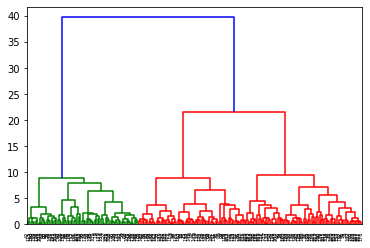

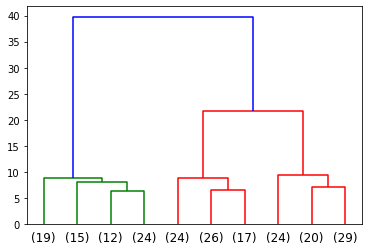

In [8]:
wardlink = linkage(scaled_df, method = 'ward')
dend = dendrogram(wardlink)
plt.show()
dend = dendrogram(wardlink,truncate_mode='lastp',p = 10,)
plt.show()

In [9]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
print(clusters)
clusters = fcluster(wardlink, 15, criterion='distance')
print(clusters)

[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]
[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


In [10]:
data['clusters'] = clusters
print(data.head())
print(data.clusters.value_counts().sort_index())
data.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_clusthiretclsu.csv')

   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters  
0         3.763            3.252                         6.550         1  
1         3.582            3.336                         5.144         3  
2         3.755            3.368                         6.148         1  
3         2.641            5.182                         5.185         2  
4         3.694            2.068                         5.837         1  
1    70
2    67
3    73
Name: clusters, dtype: int64


In [11]:
print("cluster based sort\n",data['clusters'].value_counts().sort_index())
aggdata=data.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=data['clusters'].value_counts().sort_index()
print("aggdata\n",aggdata)
aggdata.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_Aggdata_1.csv')

cluster based sort
 1    70
2    67
3    73
Name: clusters, dtype: int64
aggdata
            spending  advance_payments  probability_of_full_payment  \
clusters                                                             
1         18.371429         16.145429                     0.884400   
2         11.872388         13.257015                     0.848072   
3         14.199041         14.233562                     0.879190   

          current_balance  credit_limit  min_payment_amt  \
clusters                                                   
1                6.158171      3.684629         3.639157   
2                5.238940      2.848537         4.949433   
3                5.478233      3.226452         2.612181   

          max_spent_in_single_shopping  Freq  
clusters                                      
1                             6.017371    70  
2                             5.122209    67  
3                             5.086178    73  


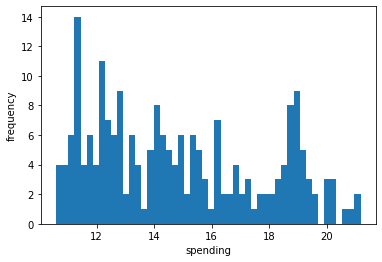

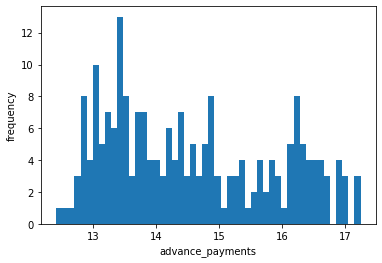

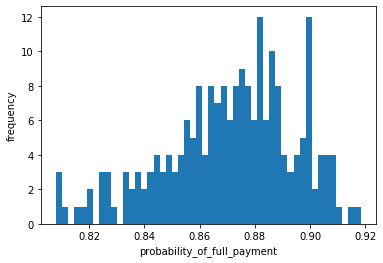

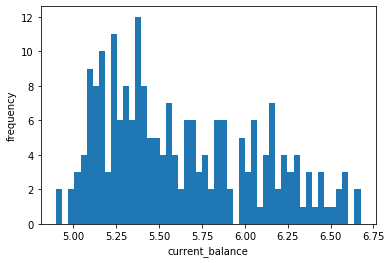

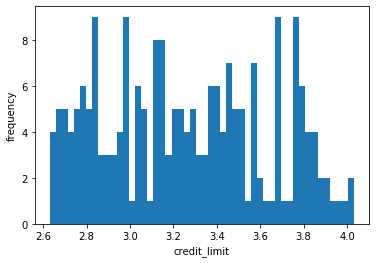

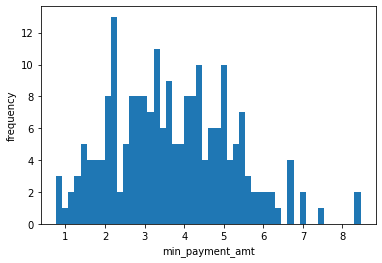

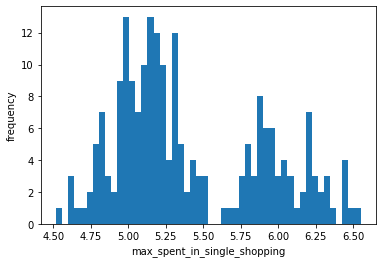

In [12]:
def histplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            plt.hist(data.iloc[:,i], bins=50)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
histplot(data)

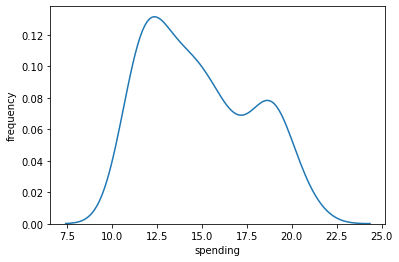

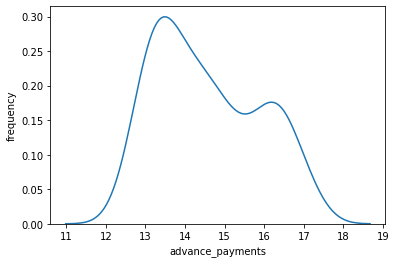

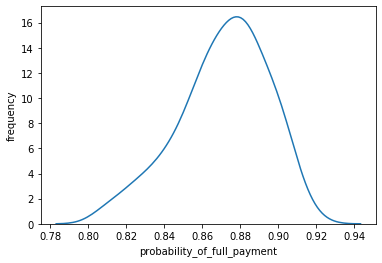

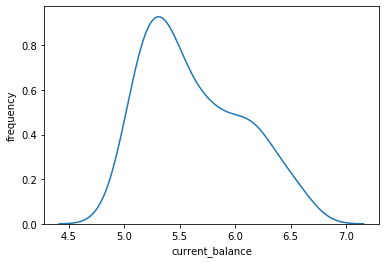

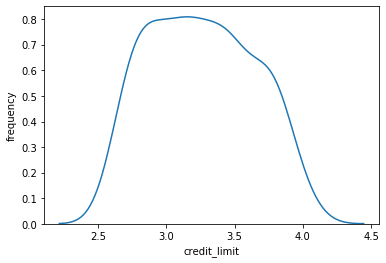

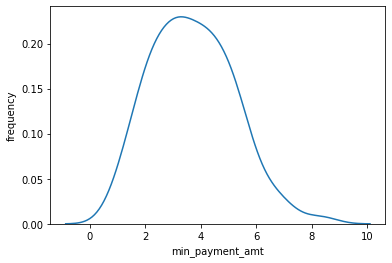

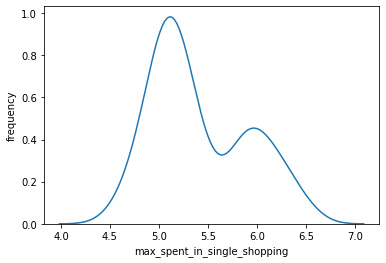

In [13]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
distplot(data)

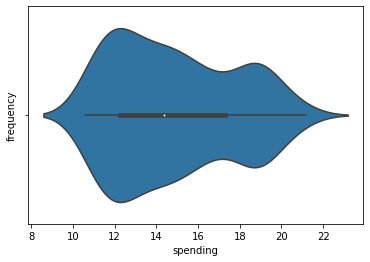

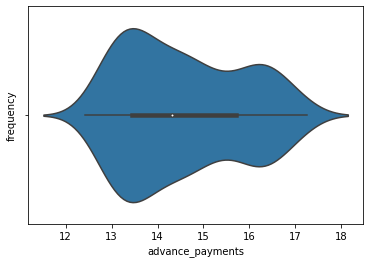

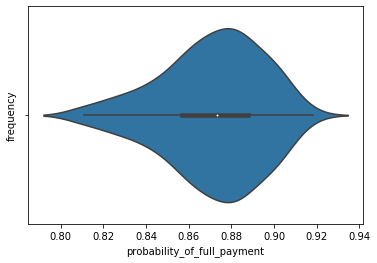

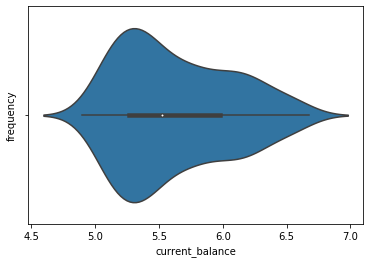

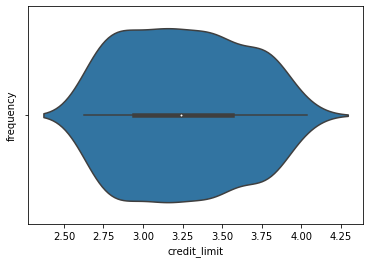

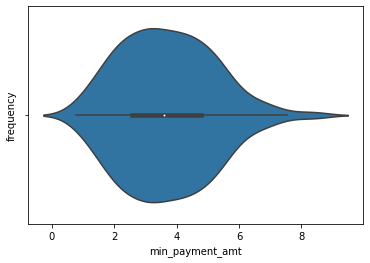

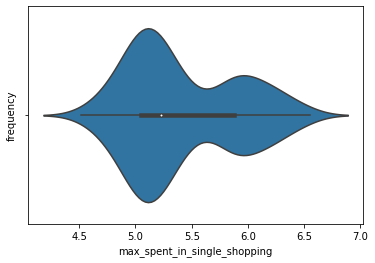

In [14]:
def violinplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.violinplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
violinplot(data)

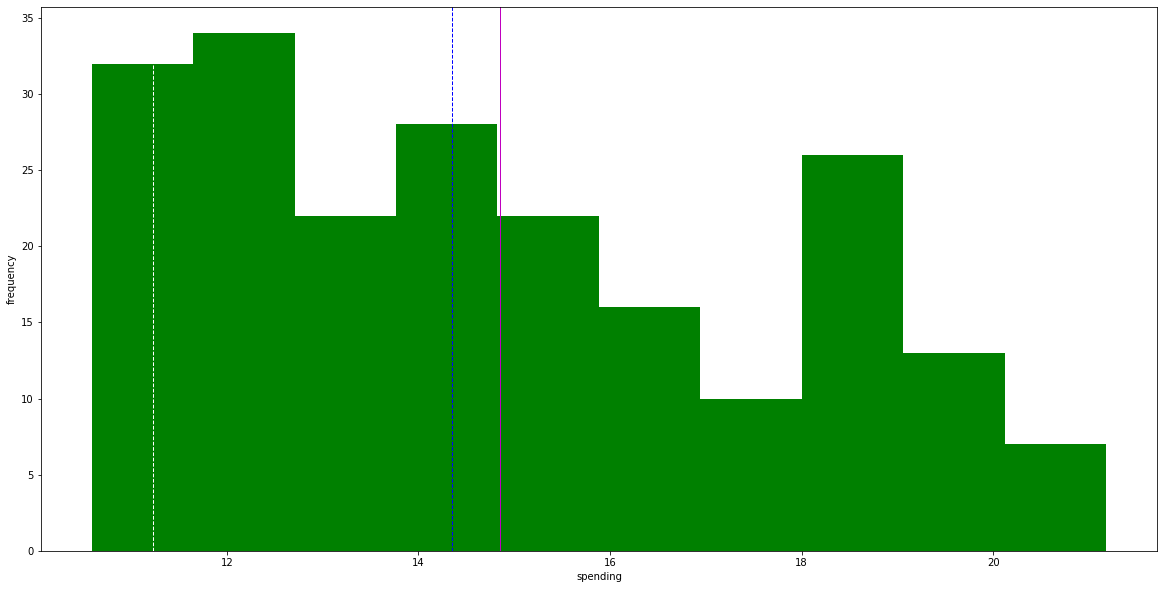

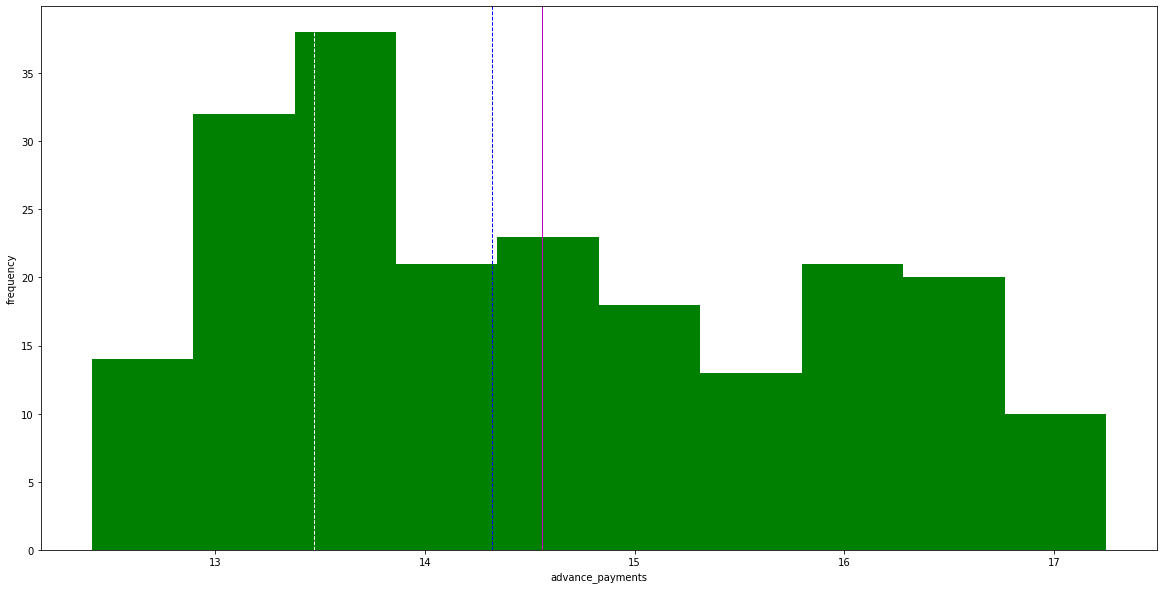

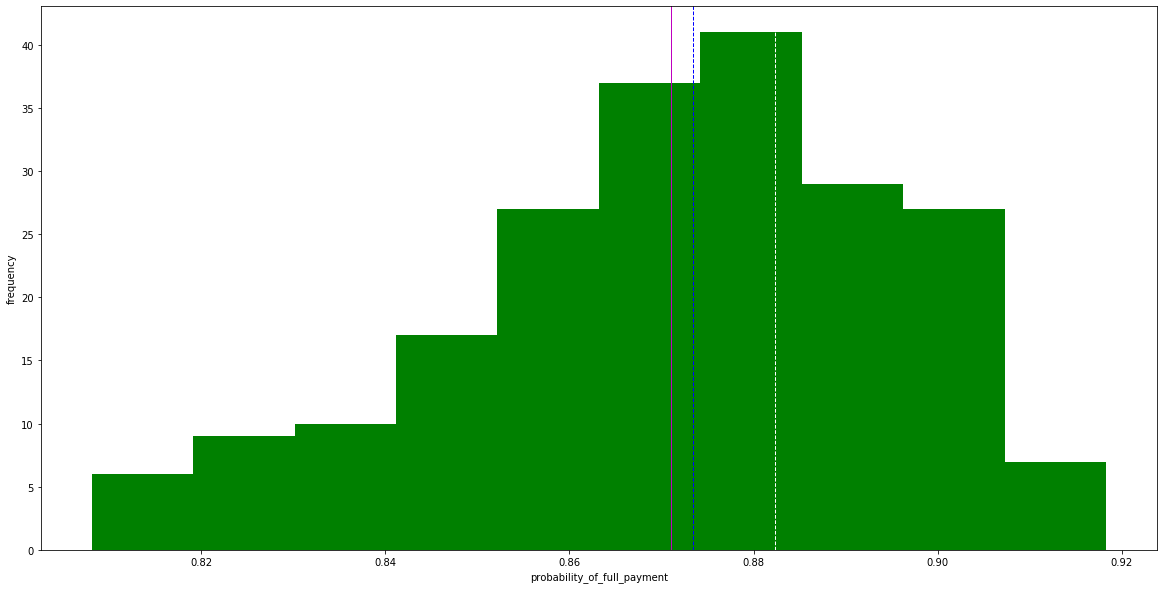

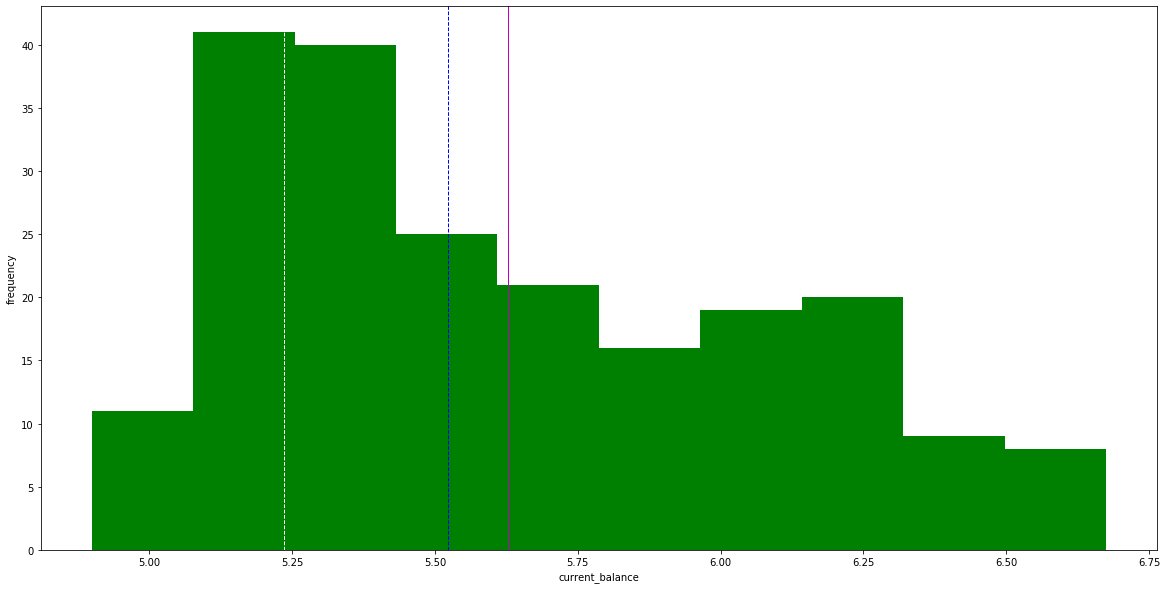

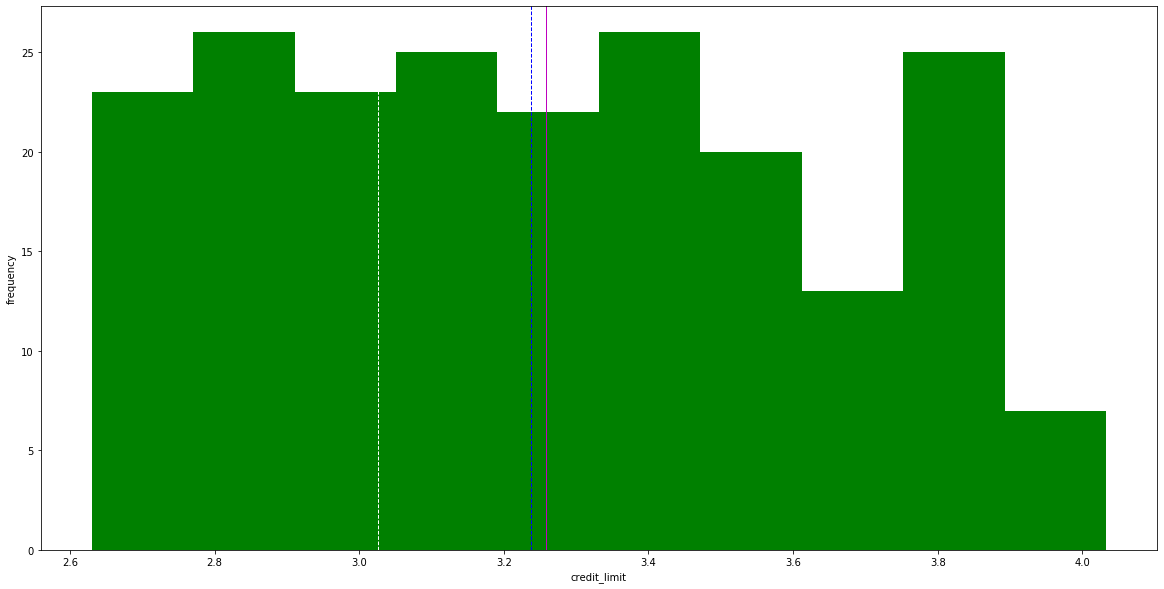

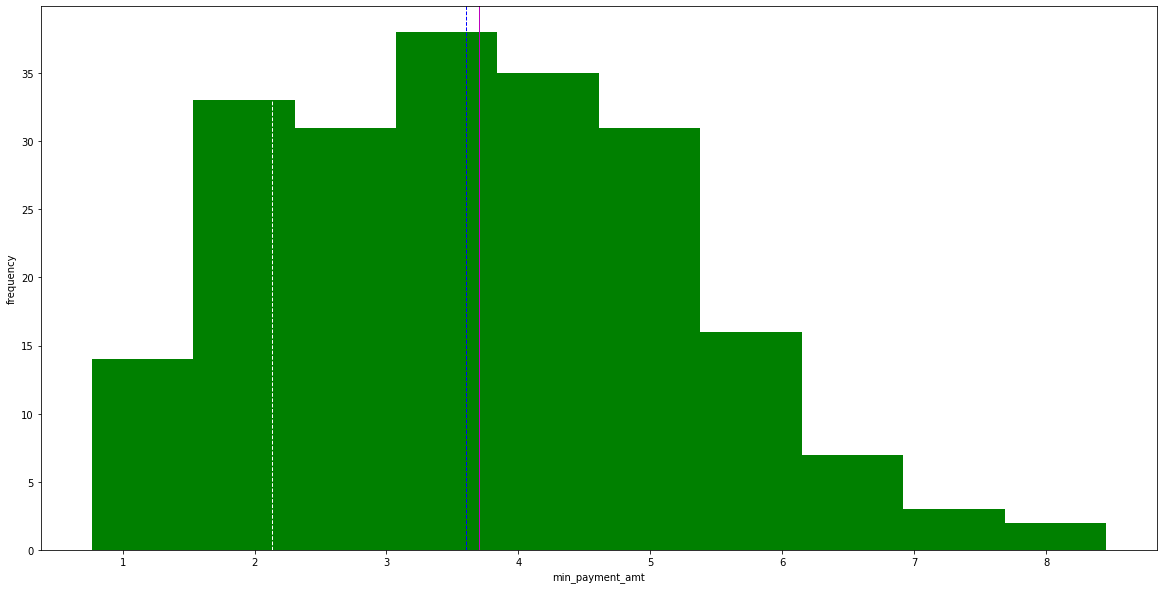

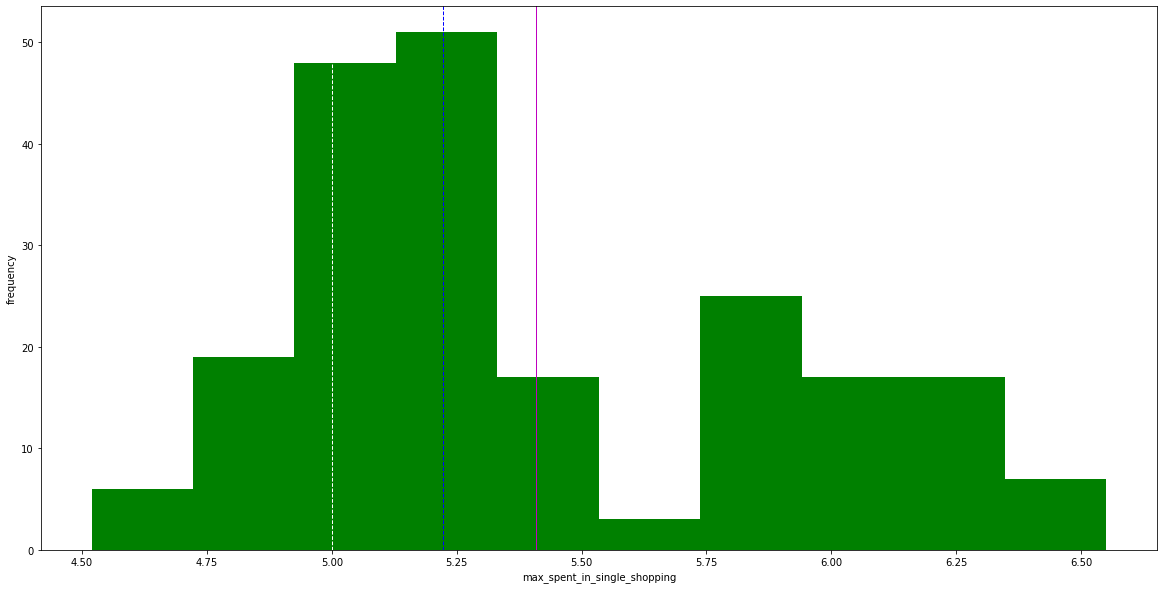

In [15]:
def closelookplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            plt.figure(figsize=(20,10)) # makes the plot wider
            plt.hist(data.iloc[:,i], color='g') # plots a simple histogram
            plt.axvline(data.iloc[:,i].mean(), color='m', linewidth=1)
            plt.axvline(data.iloc[:,i].median(), color='b', linestyle='dashed', linewidth=1)
            plt.axvline(data.iloc[:,i].mode()[0], color='w', linestyle='dashed', linewidth=1)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
closelookplot(data)

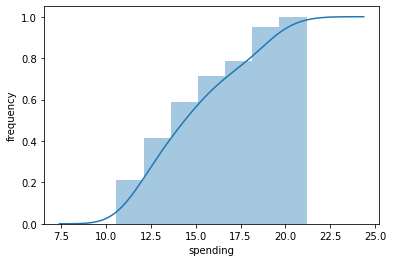

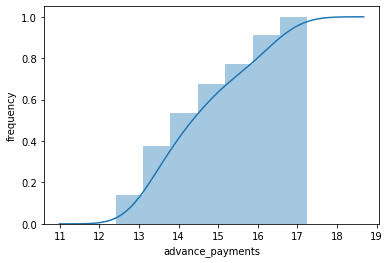

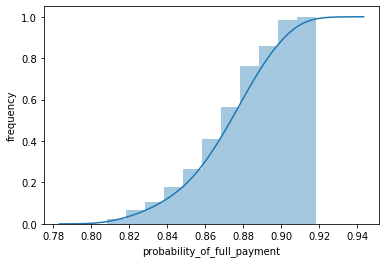

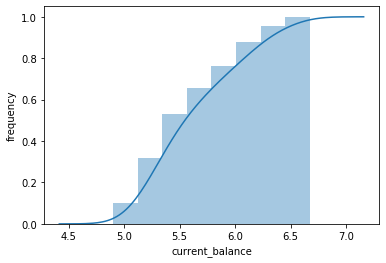

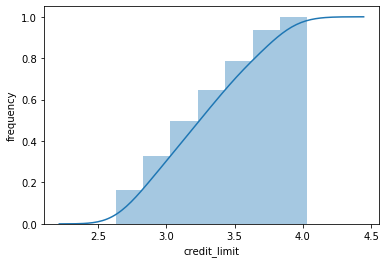

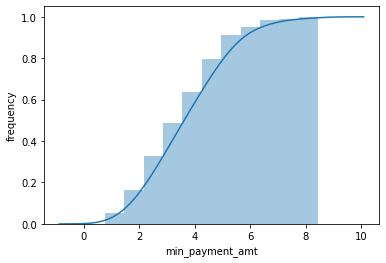

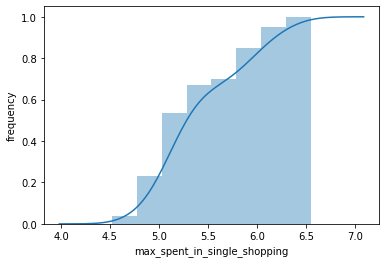

In [16]:
def cumuplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.distplot(data.iloc[:,i], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
cumuplot(data)

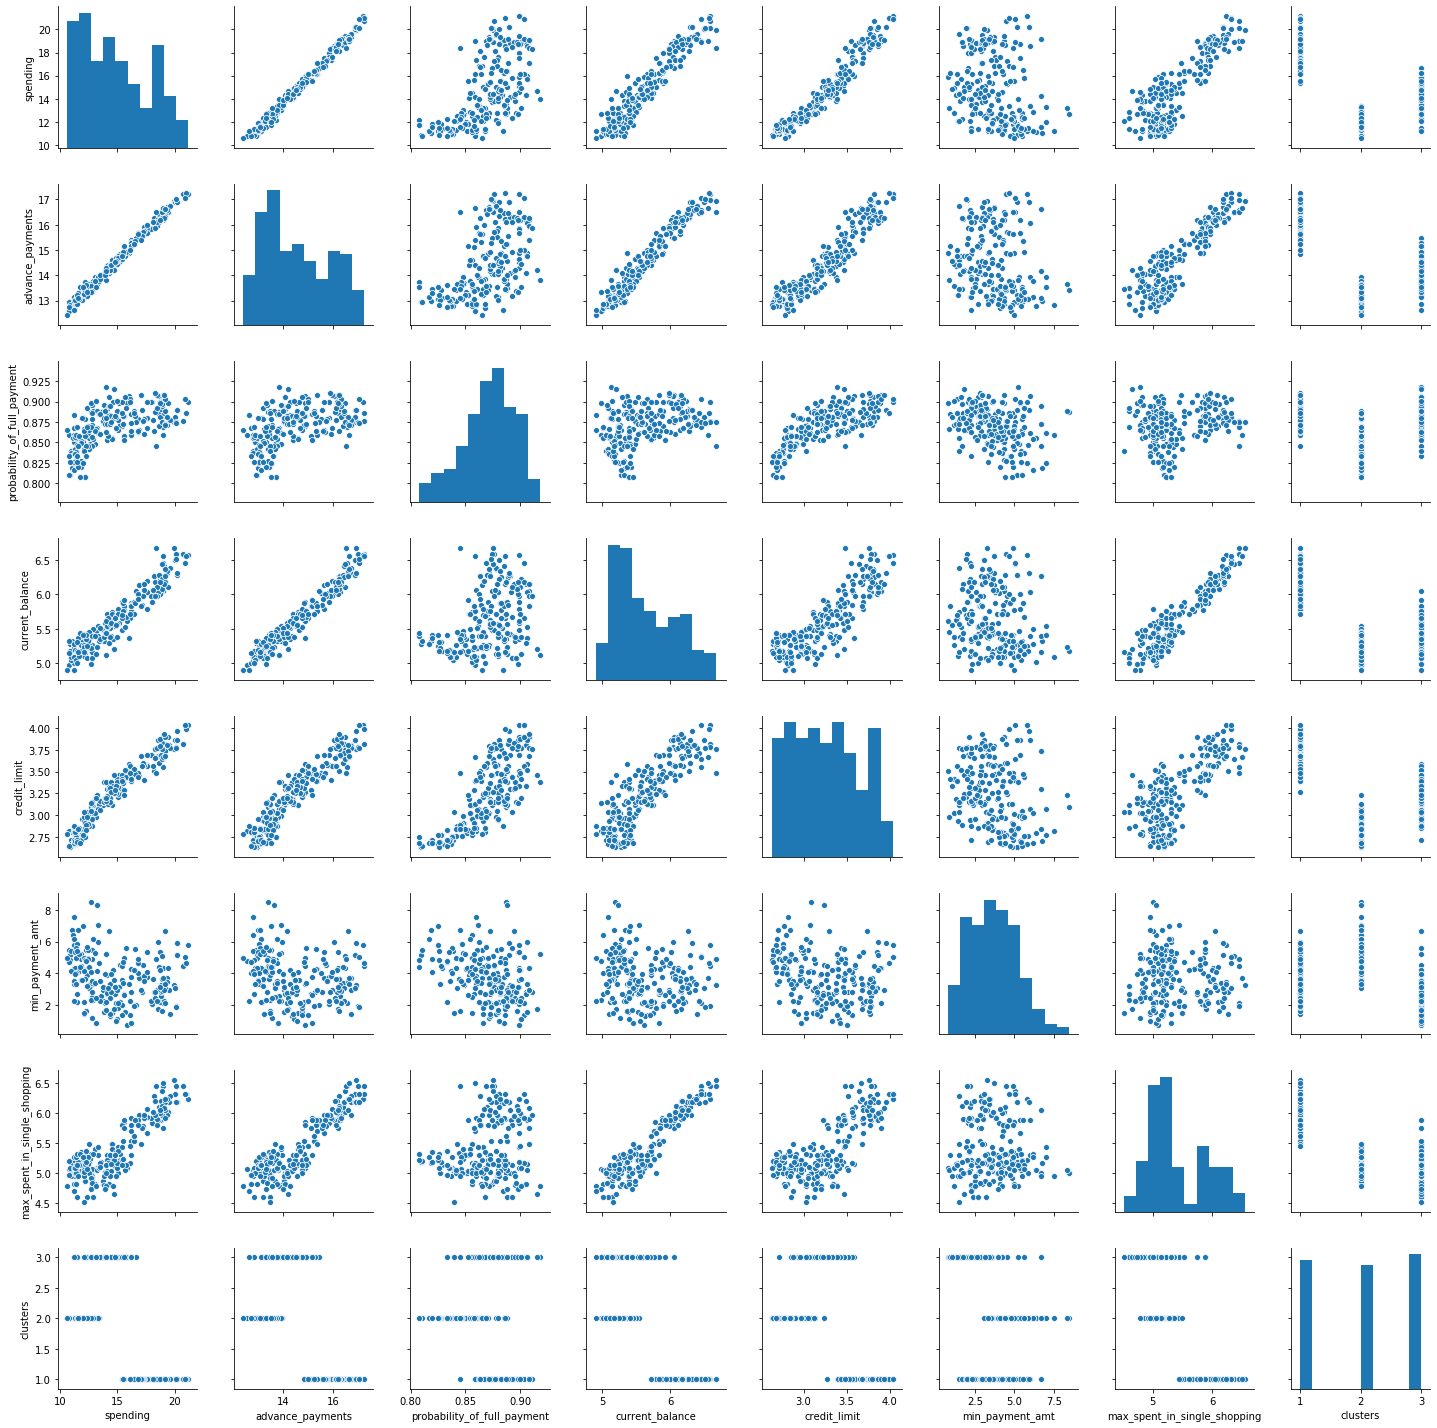

In [17]:
sns.pairplot(data)
plt.show()

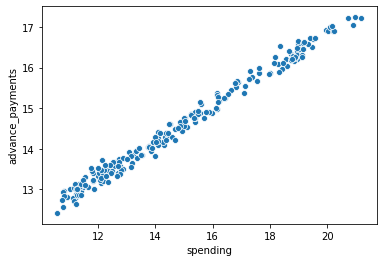

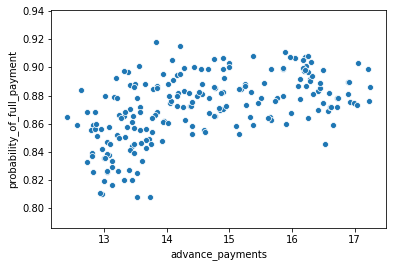

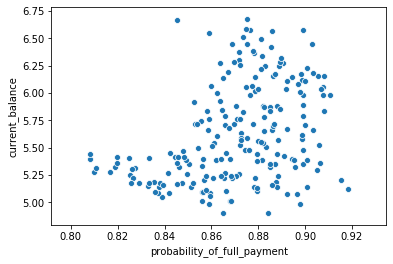

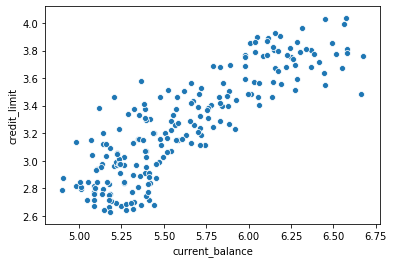

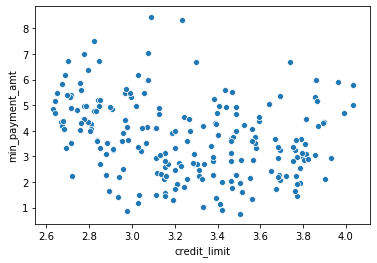

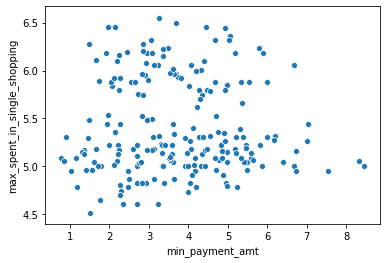

In [18]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
multiscatplot(data)

                              spending  advance_payments  \
spending                      1.000000          0.994341   
advance_payments              0.994341          1.000000   
probability_of_full_payment   0.608288          0.529244   
current_balance               0.949985          0.972422   
credit_limit                  0.970771          0.944829   
min_payment_amt              -0.229572         -0.217340   
max_spent_in_single_shopping  0.863693          0.890784   
clusters                     -0.584577         -0.597186   

                              probability_of_full_payment  current_balance  \
spending                                         0.608288         0.949985   
advance_payments                                 0.529244         0.972422   
probability_of_full_payment                      1.000000         0.367915   
current_balance                                  0.367915         1.000000   
credit_limit                                     0.761635         0.8

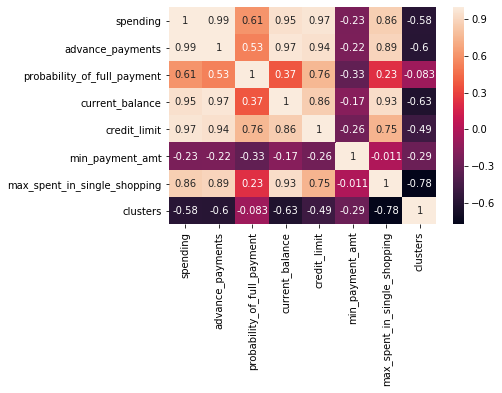

In [19]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)

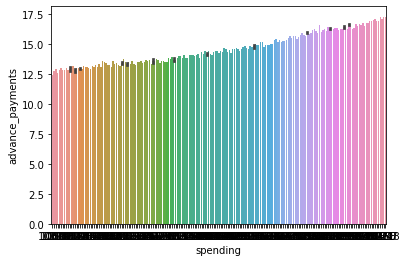

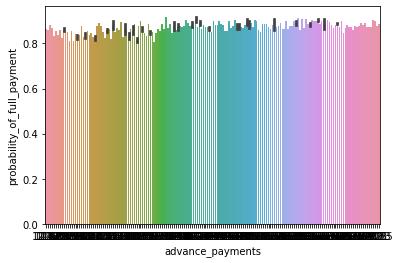

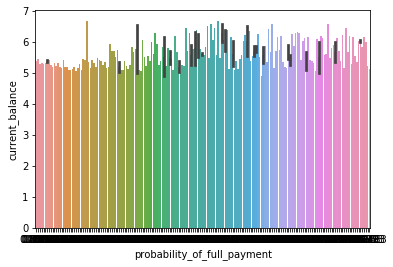

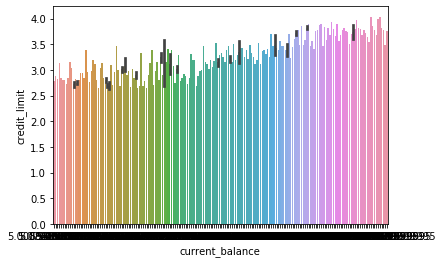

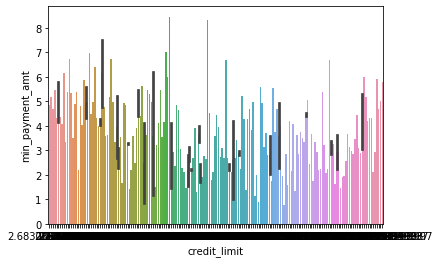

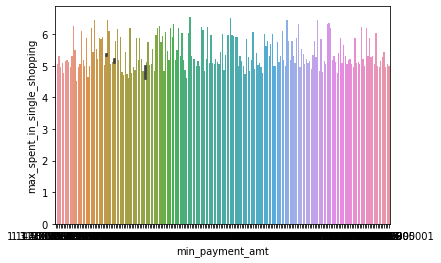

In [20]:
def barplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.barplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
barplot(data)

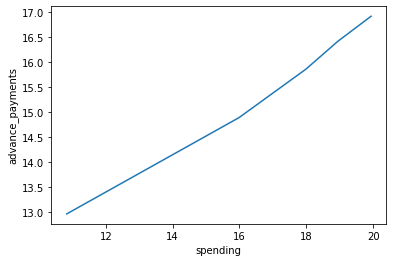

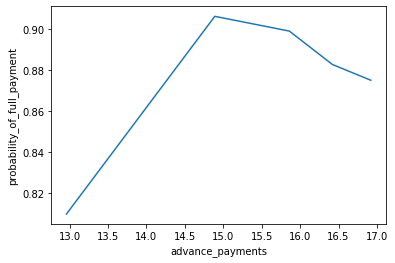

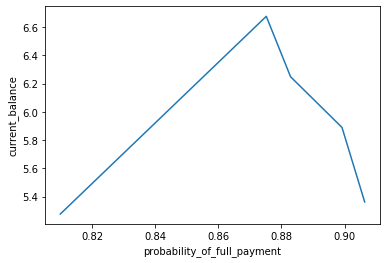

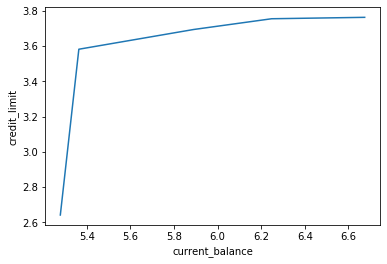

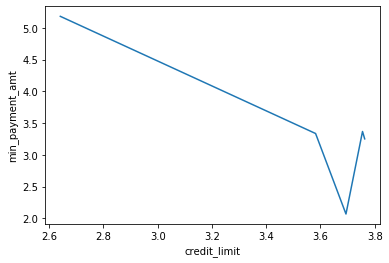

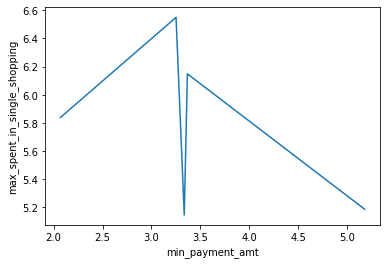

In [21]:
 def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
lineplot(data)

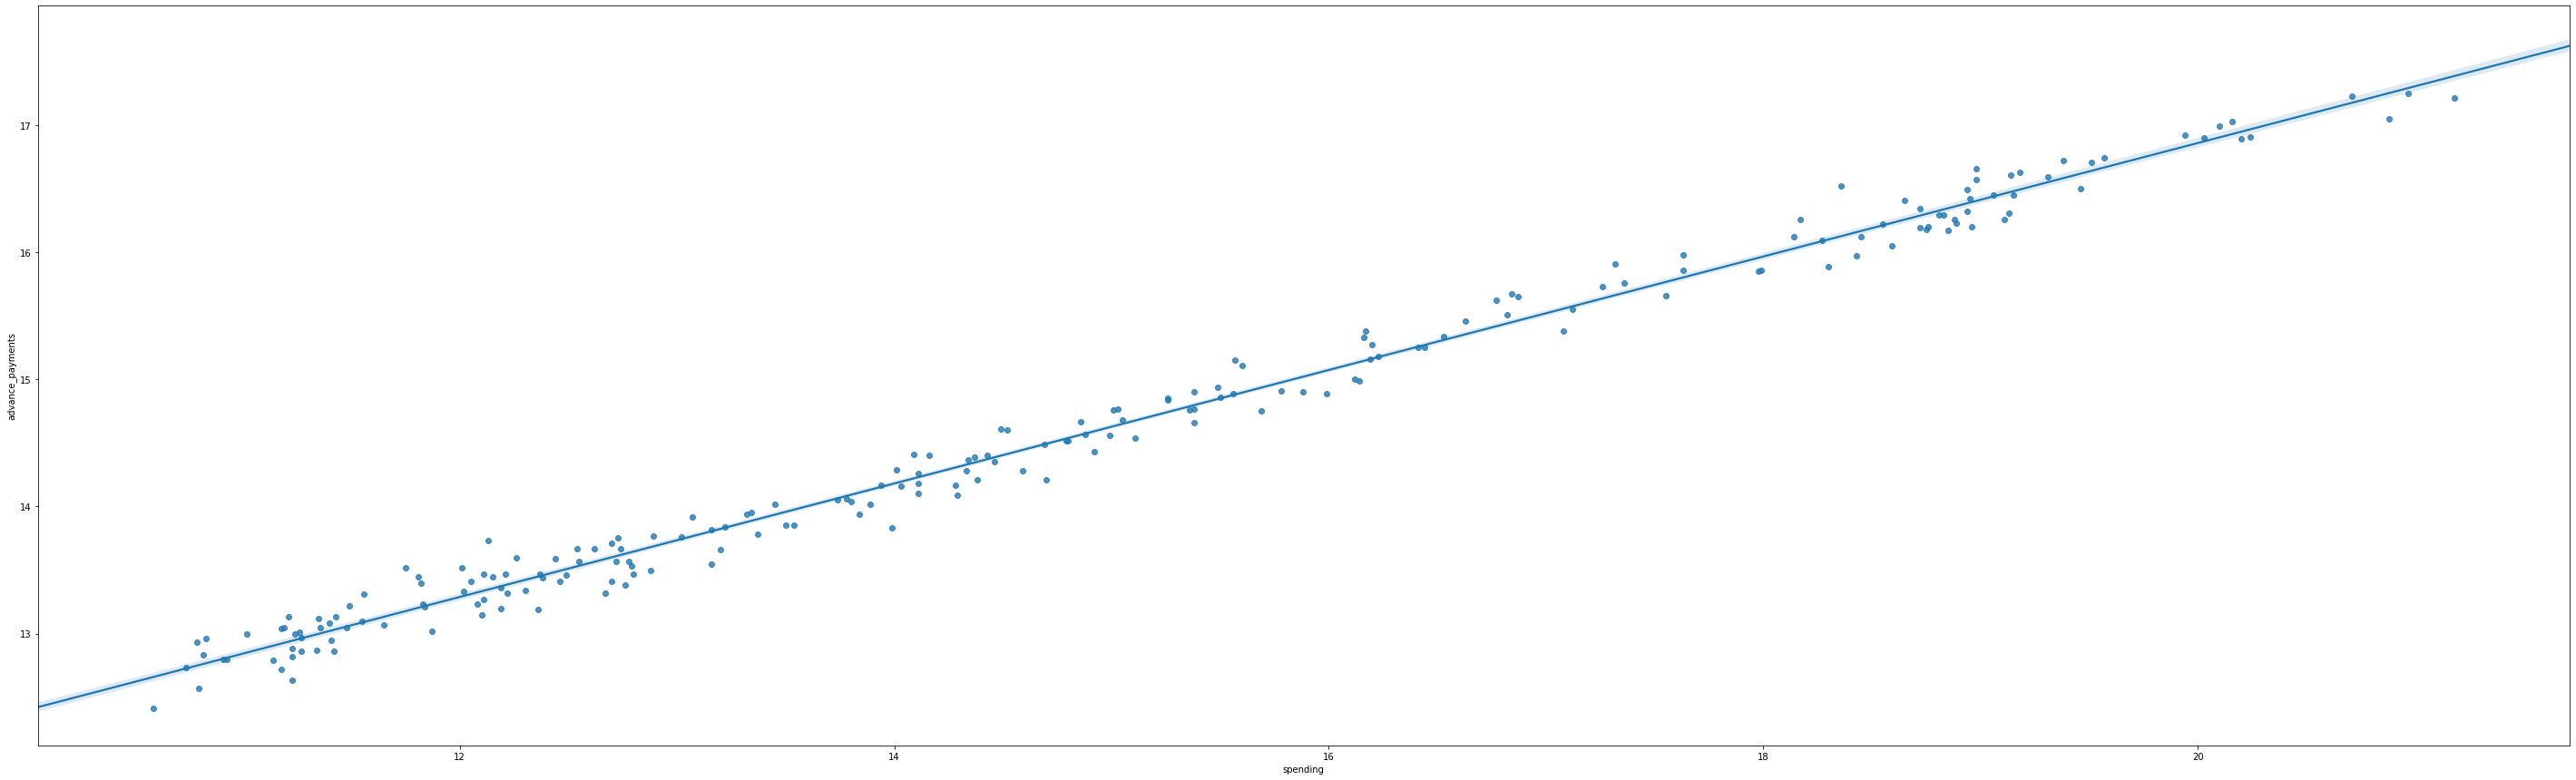

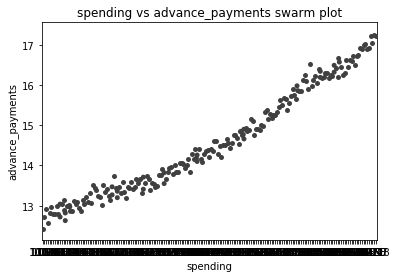

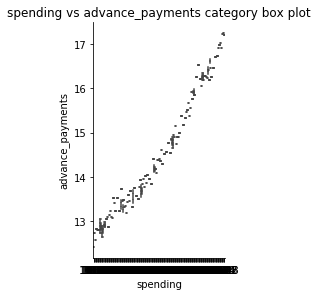

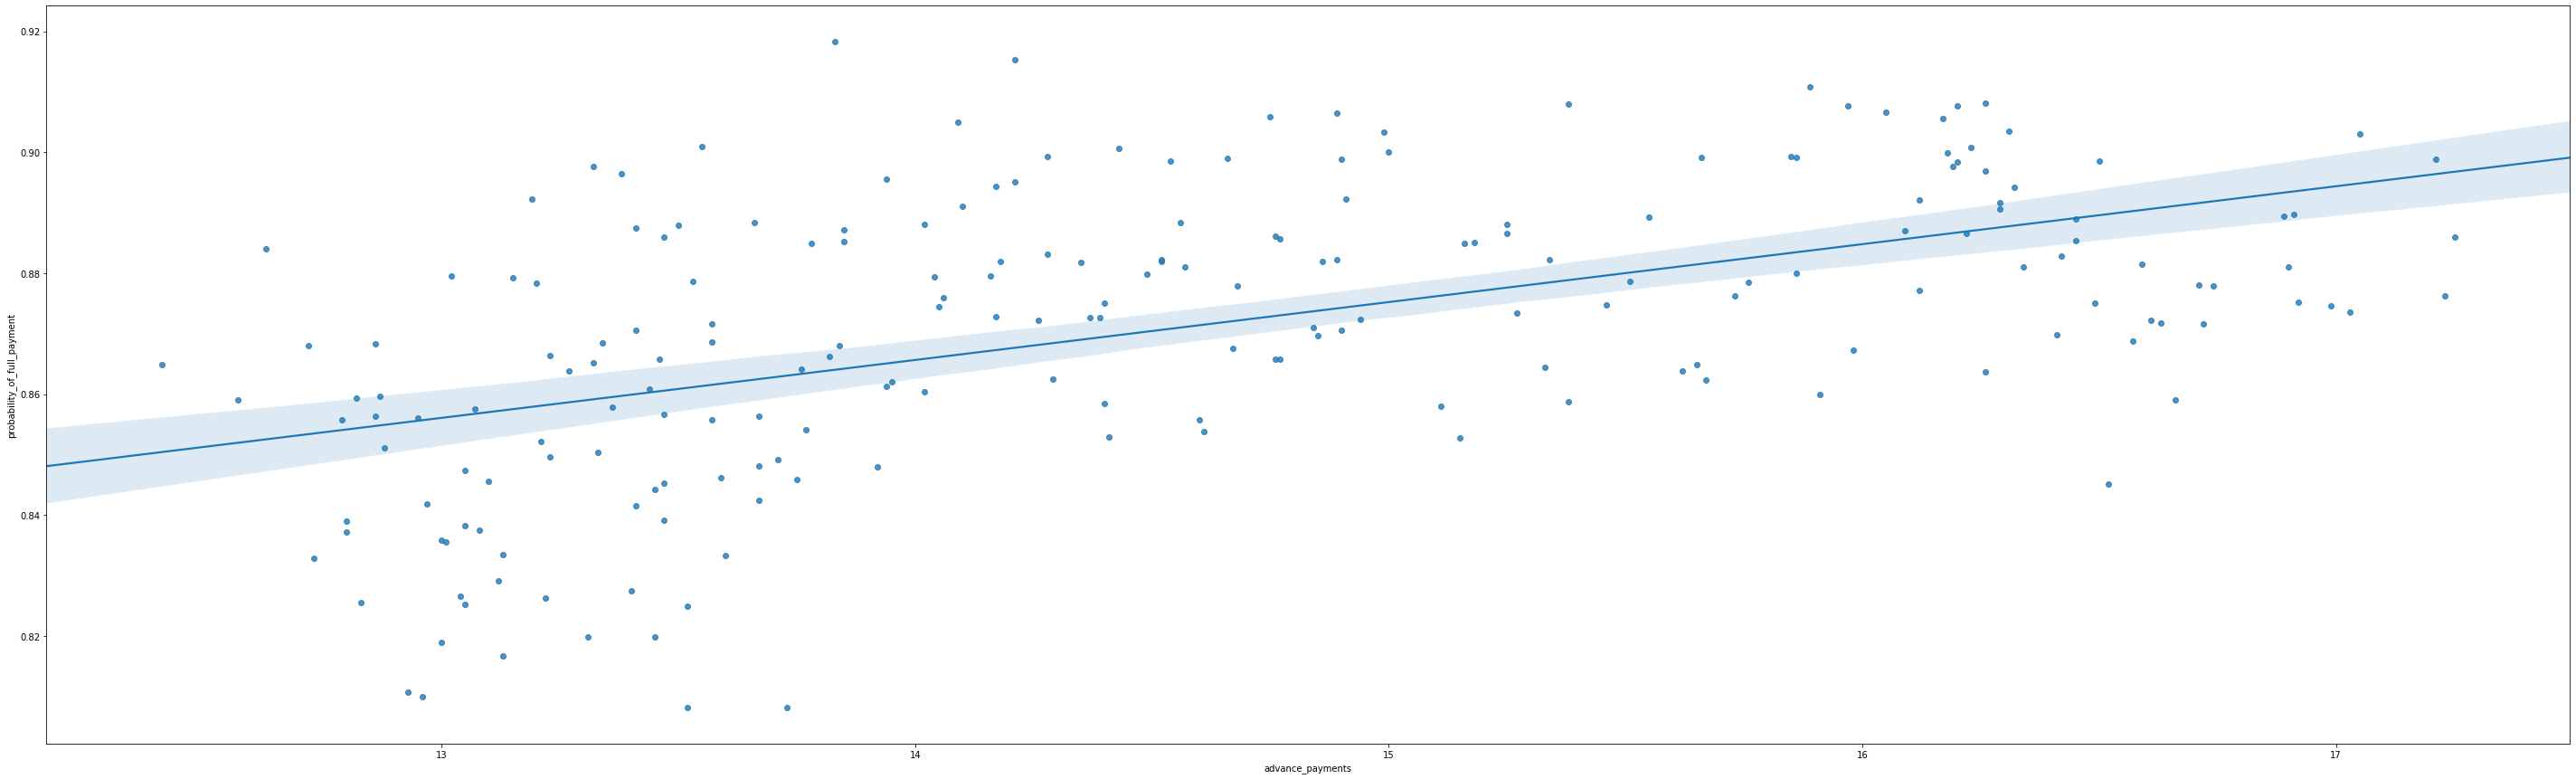

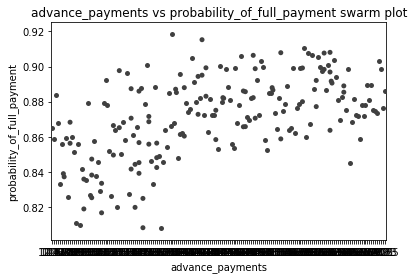

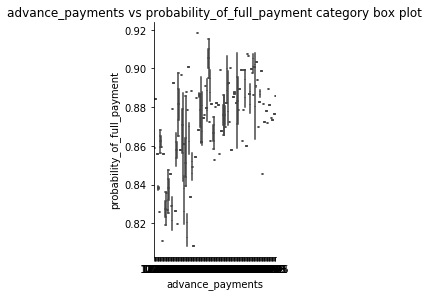

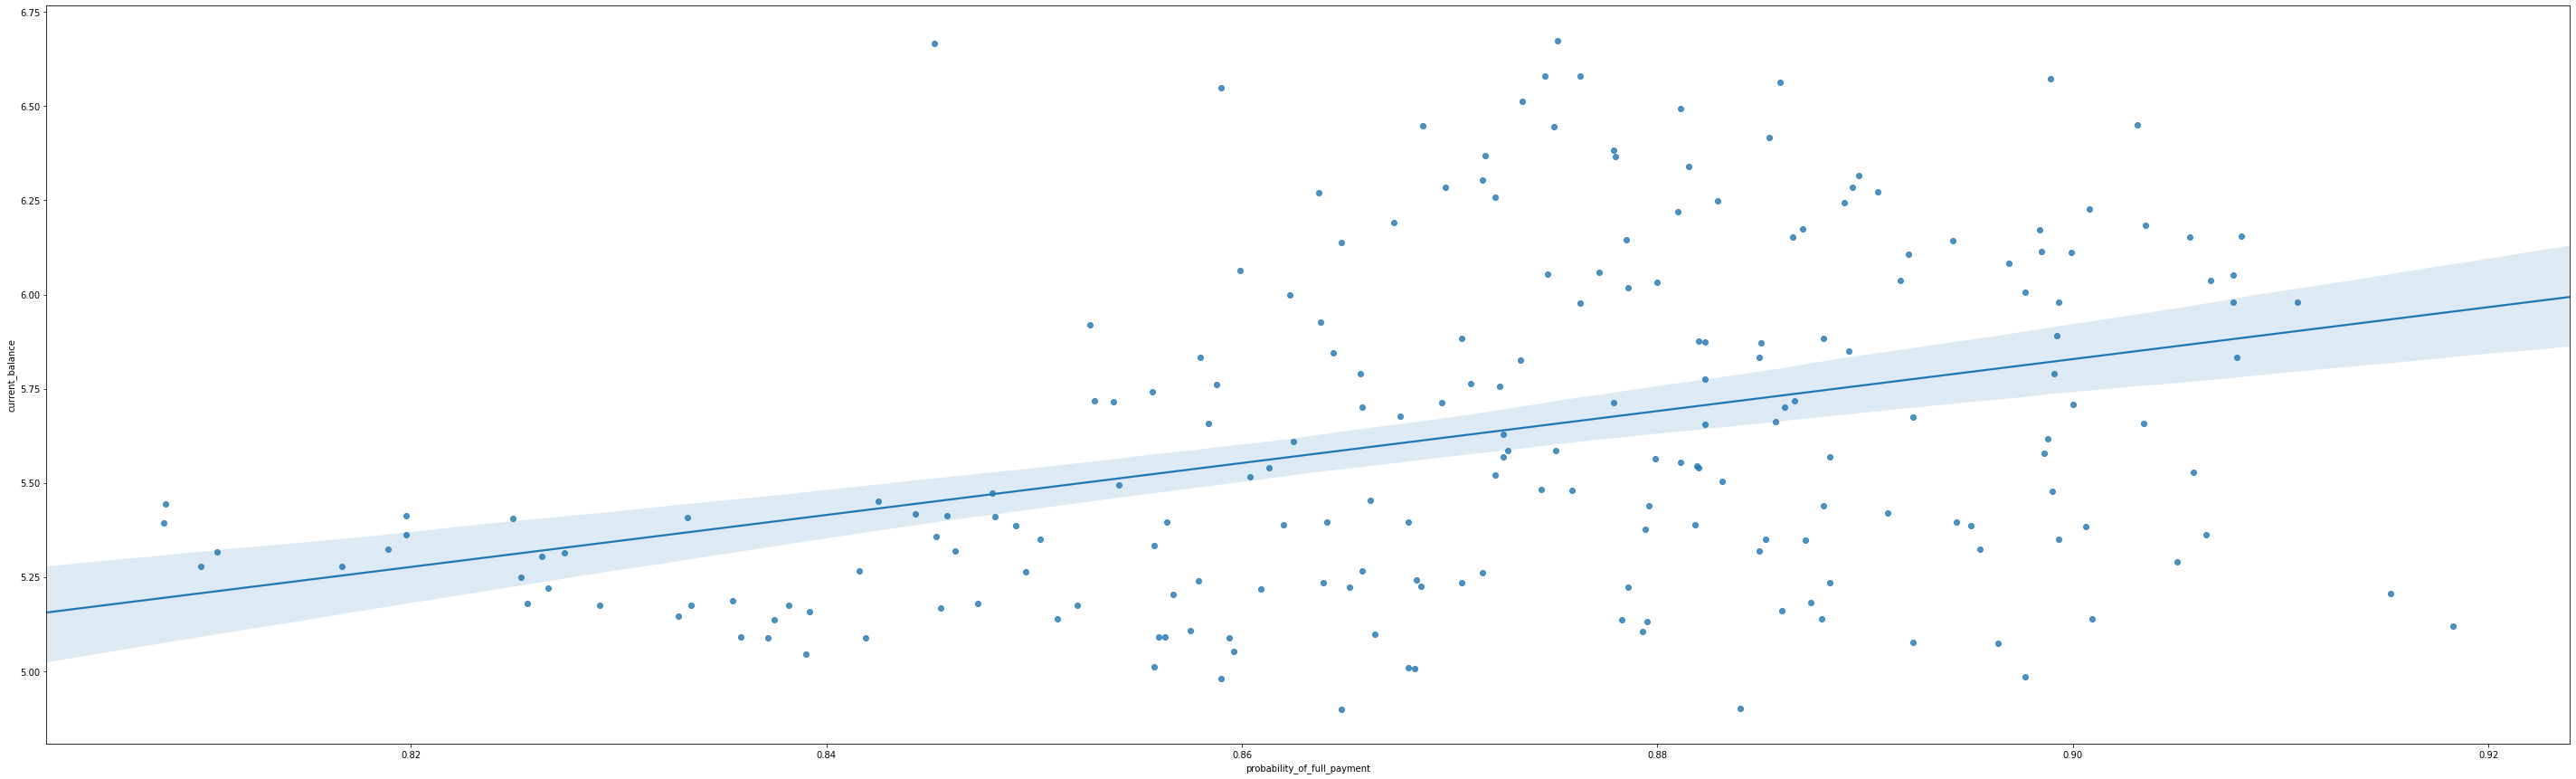

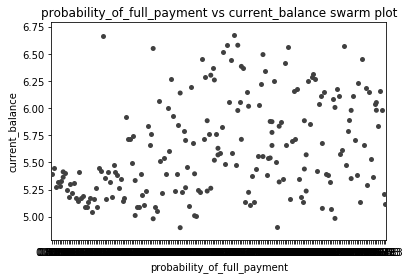

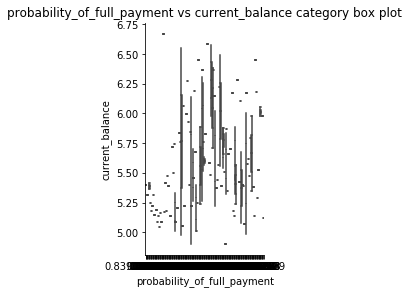

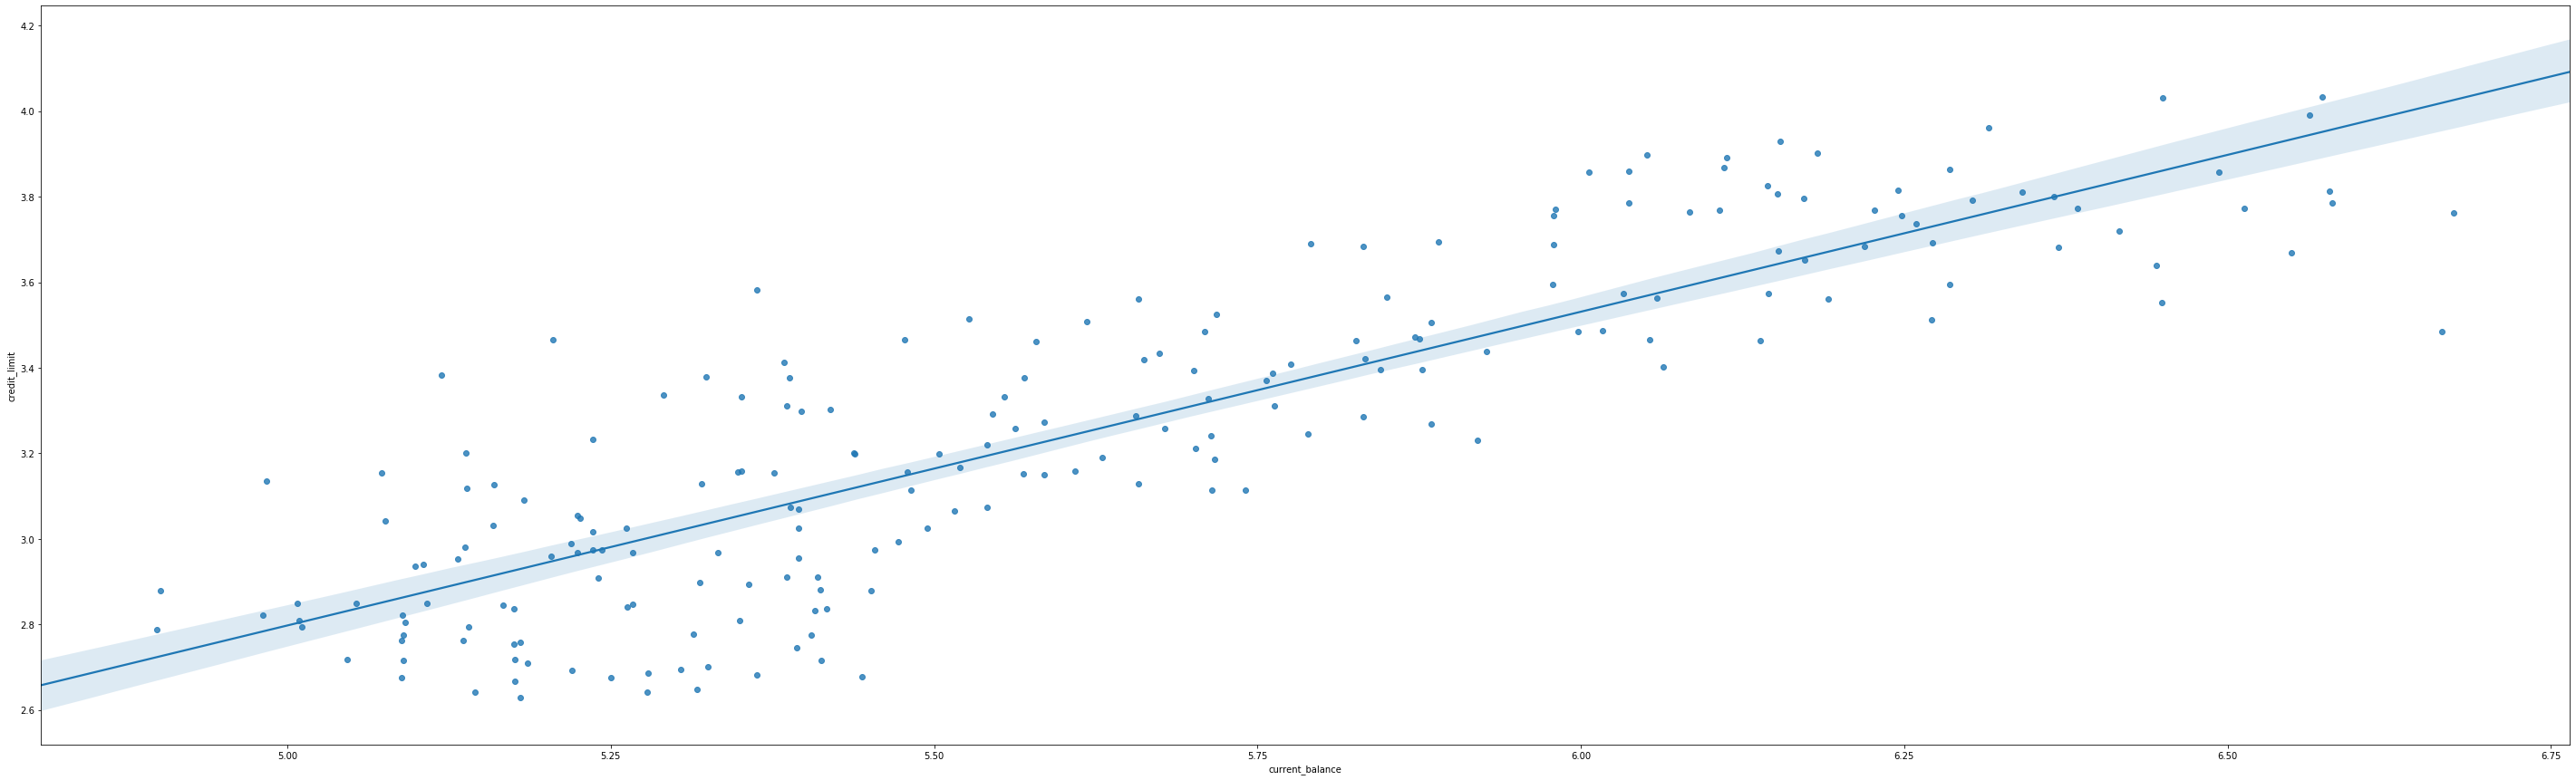

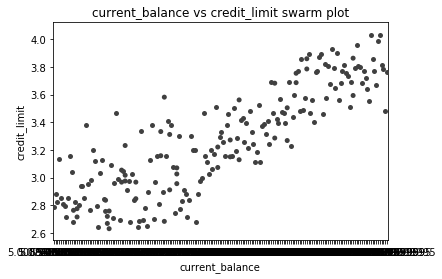

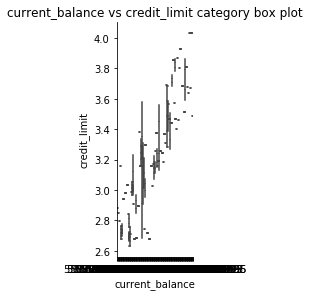

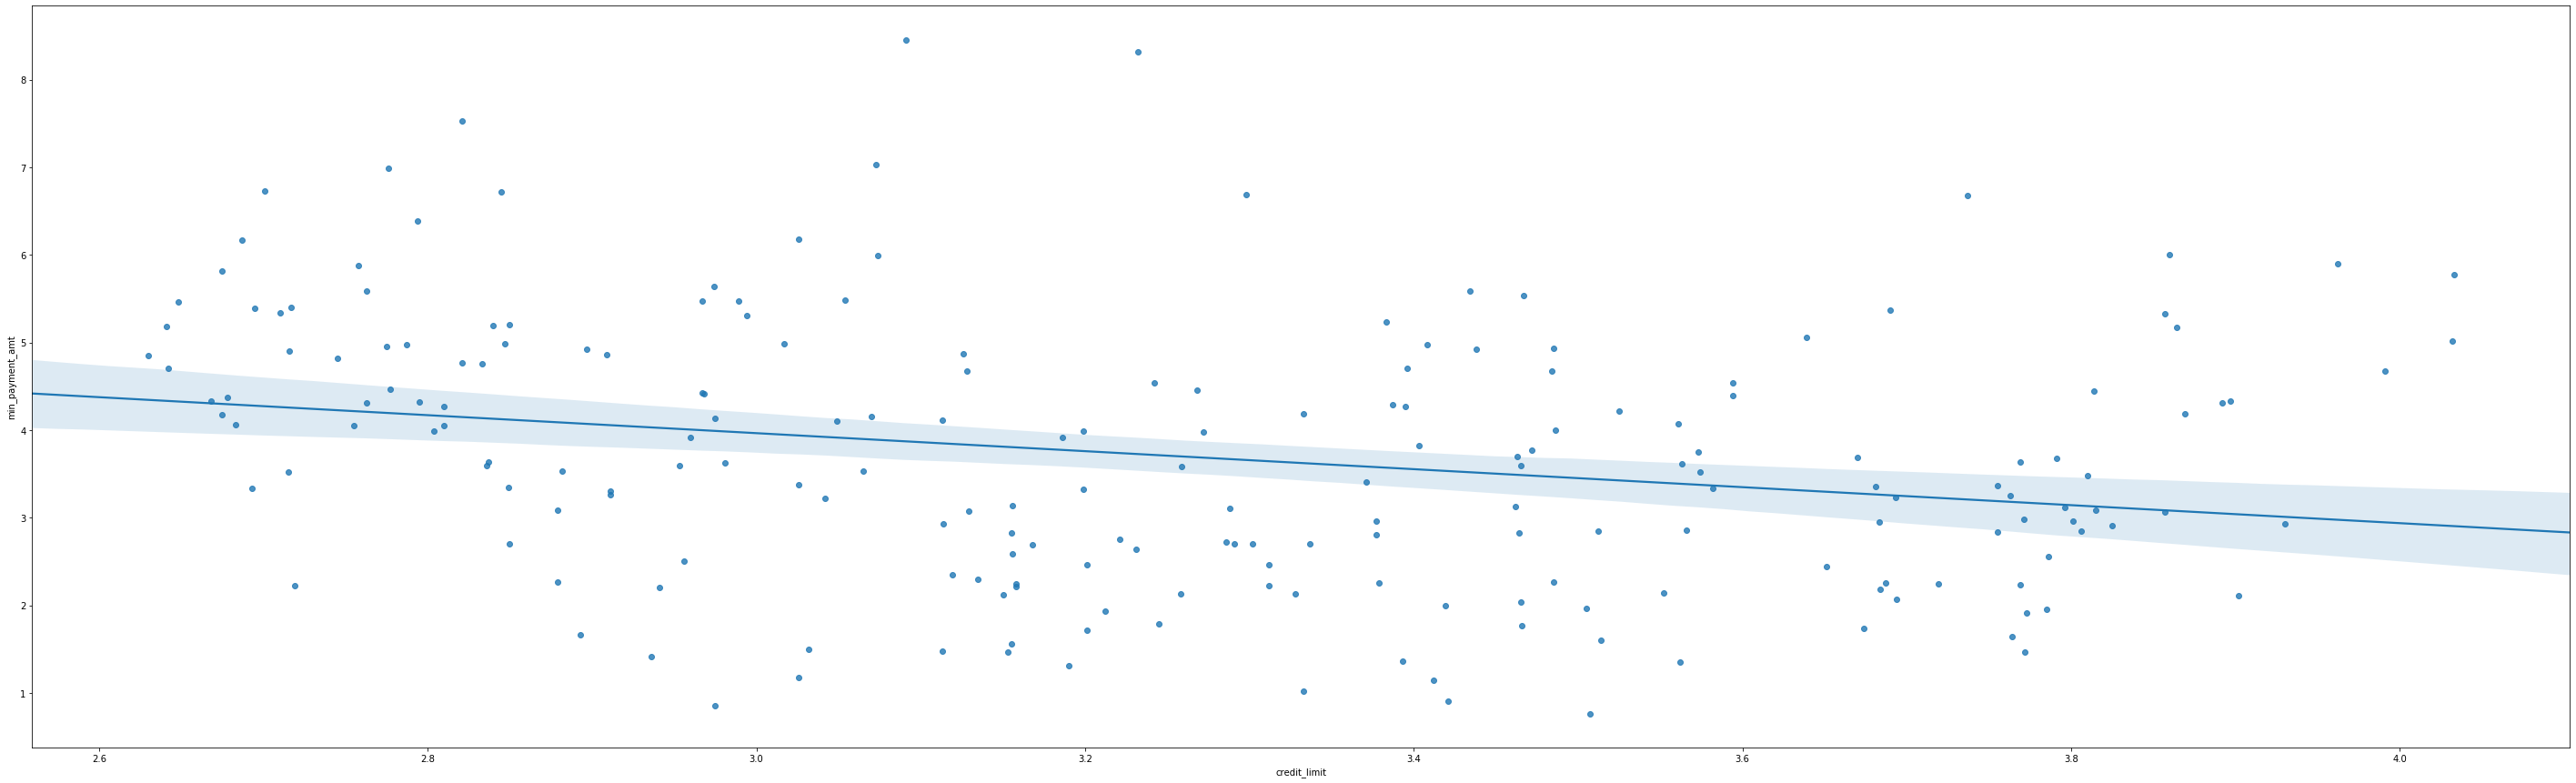

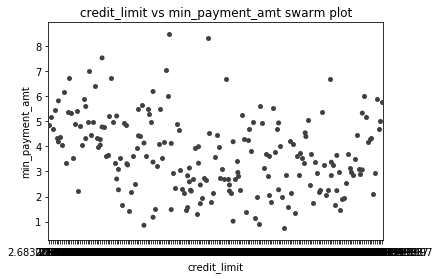

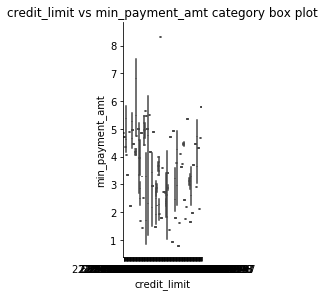

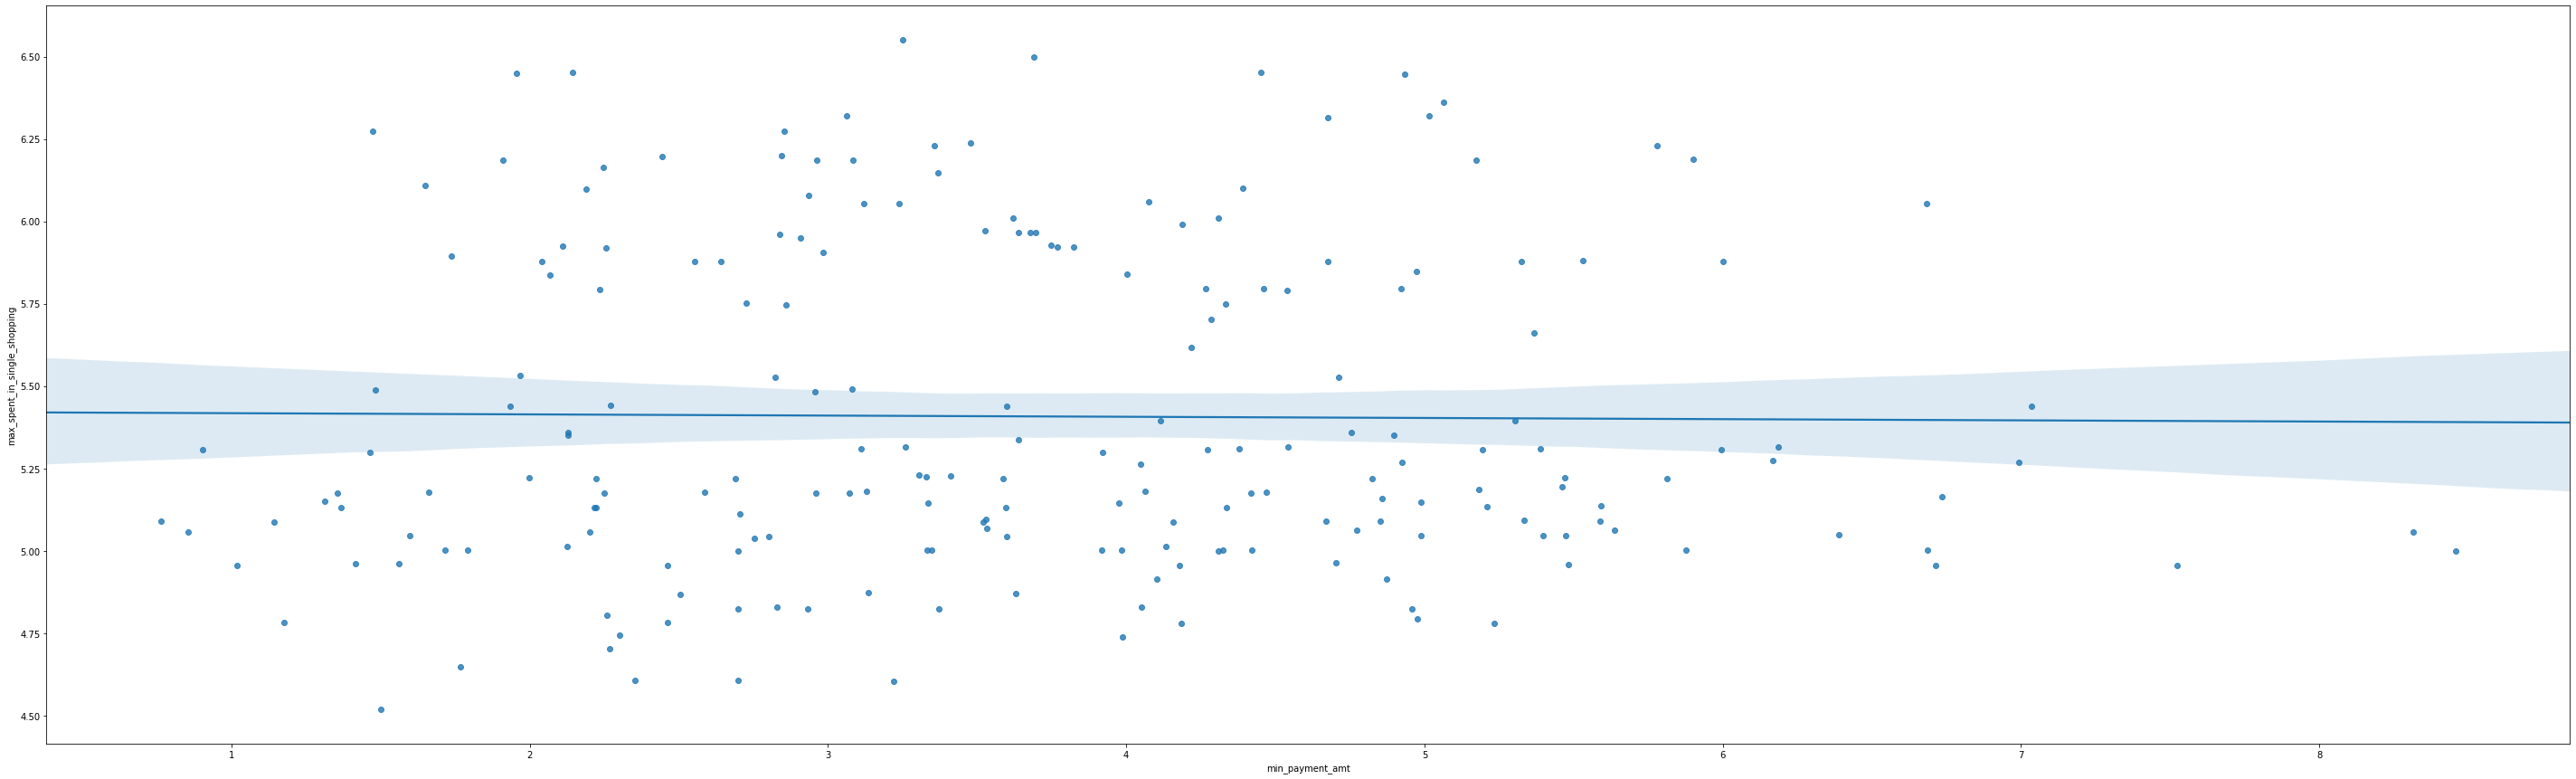

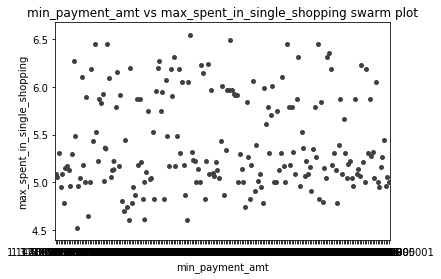

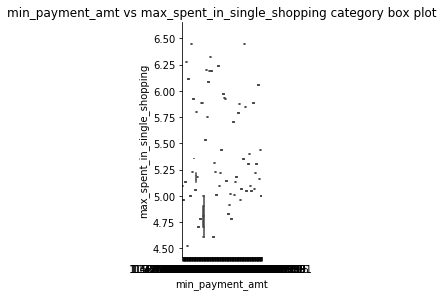

In [22]:
def regrswamcatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            figure = plt.figure(figsize=(50,15))
            sns.regplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.swarmplot(x=colnames[i], y=colnames[i+1], data=data,color=".25")
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" swarm plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.catplot(x=colnames[i], y=colnames[i+1],data=data, kind="box",height=4, aspect=.7)
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" category box plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
regrswamcatplot(data)

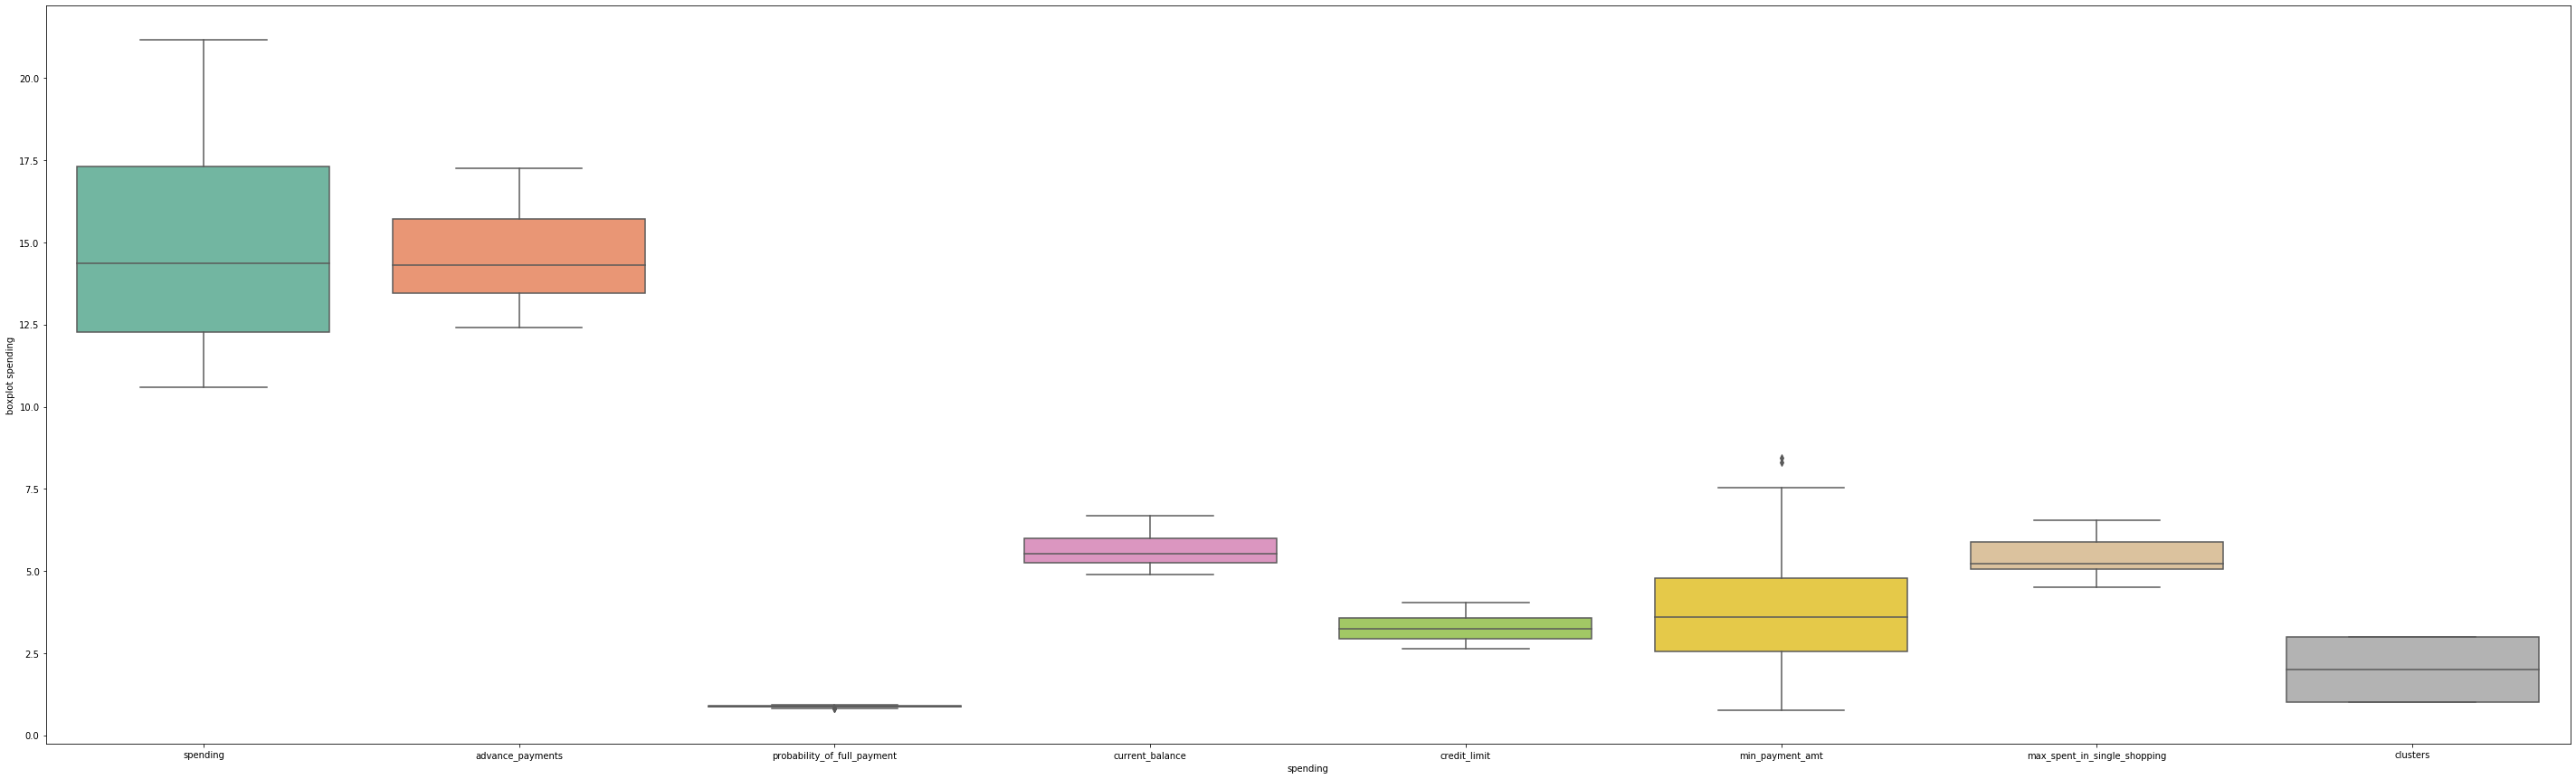

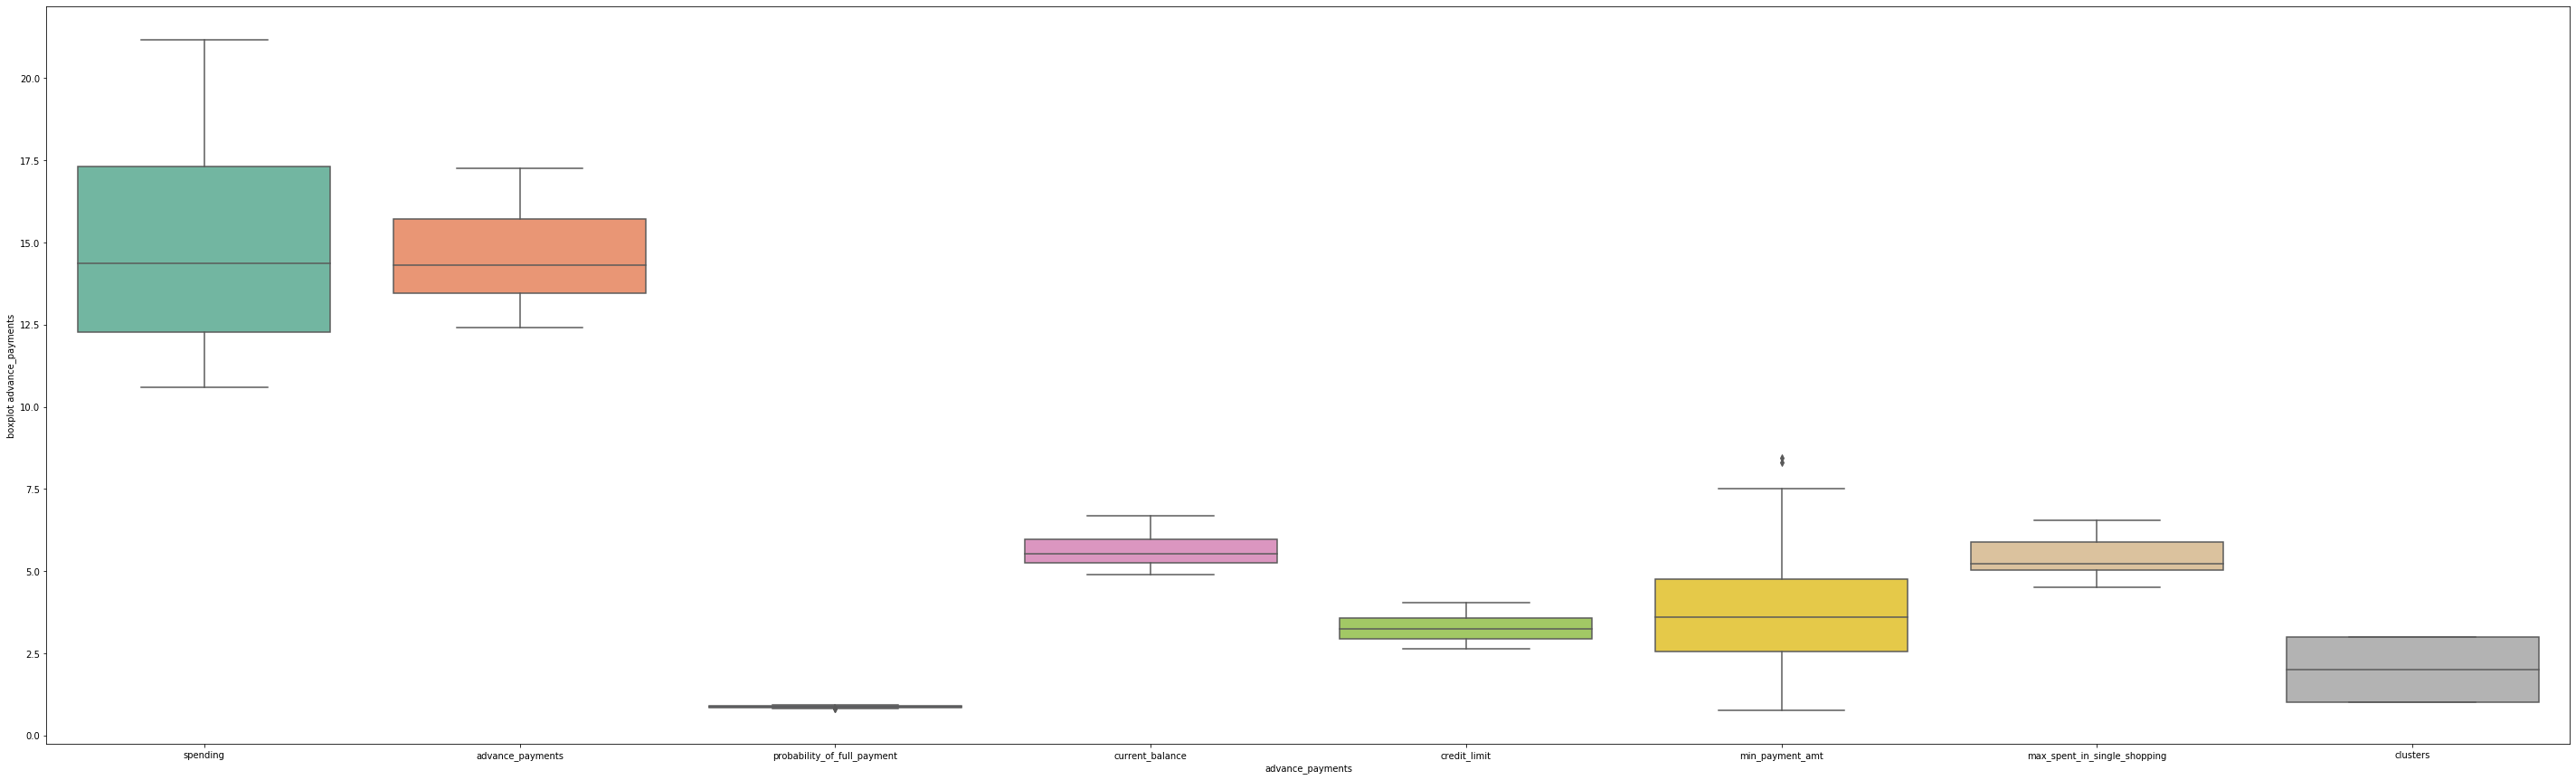

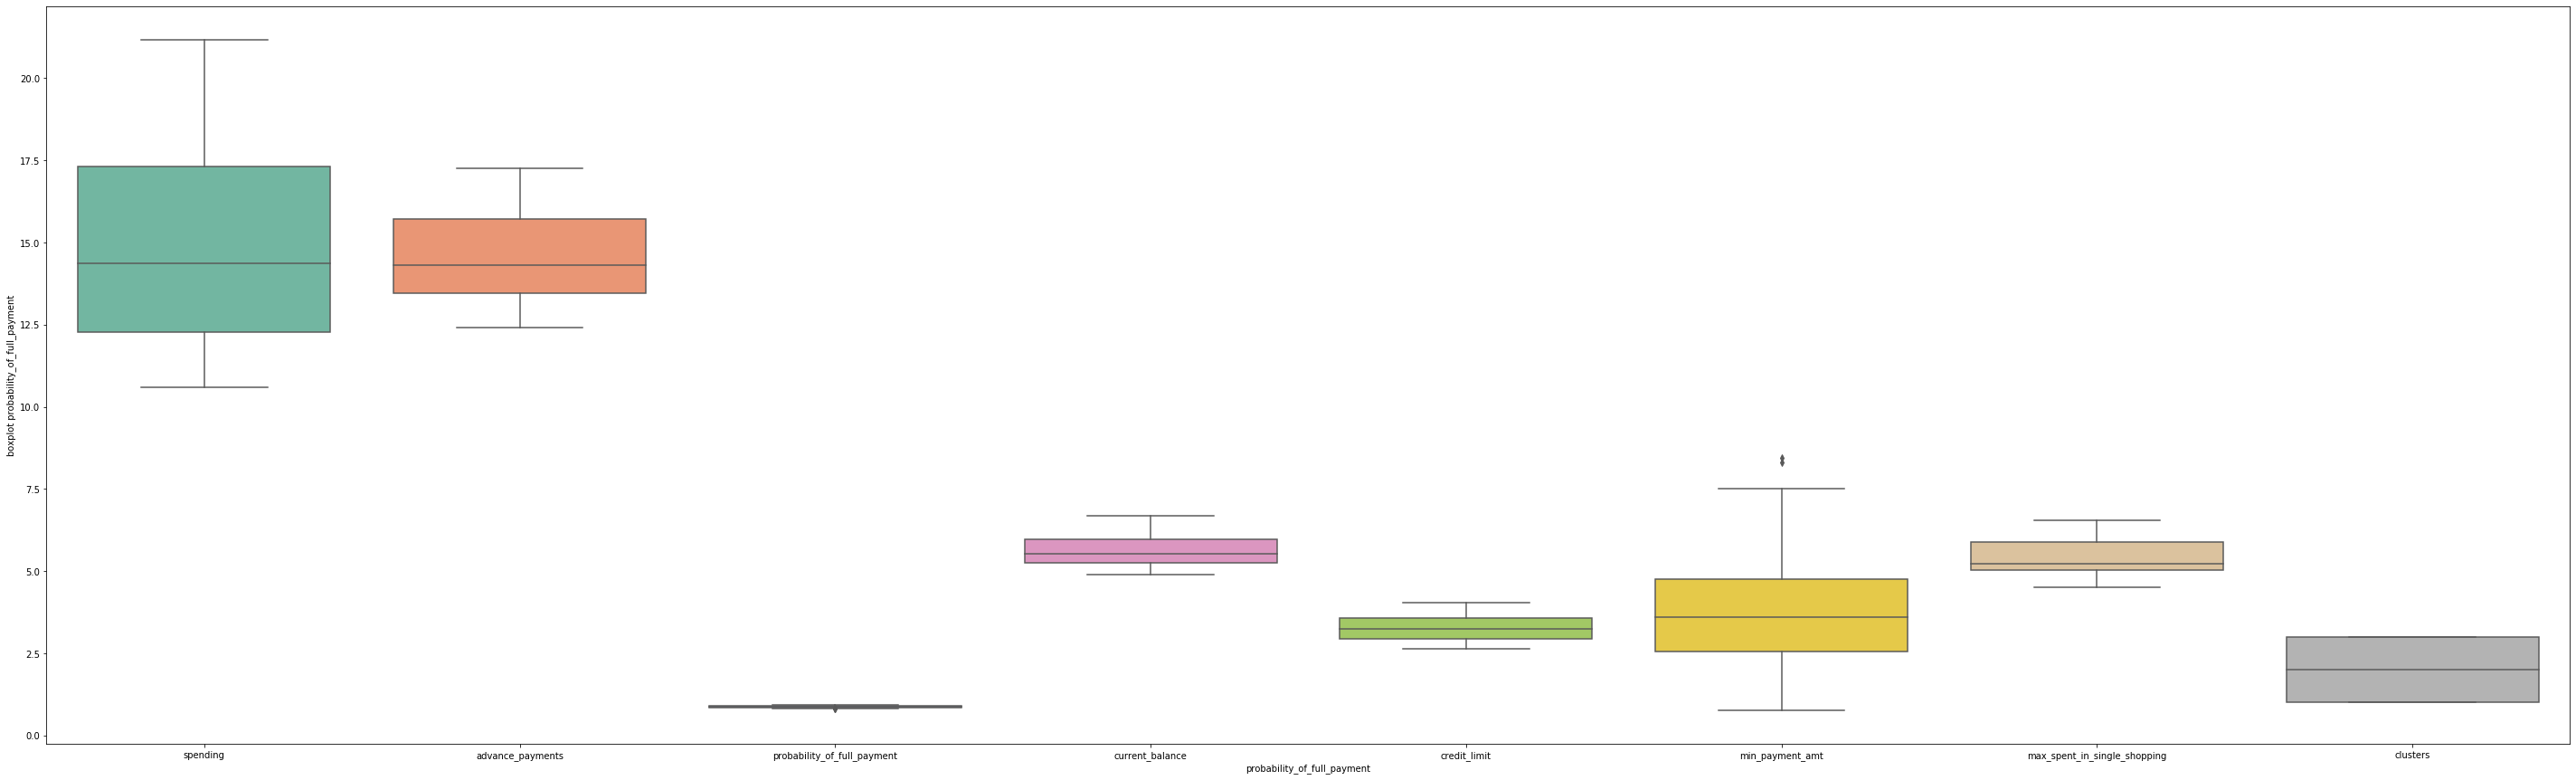

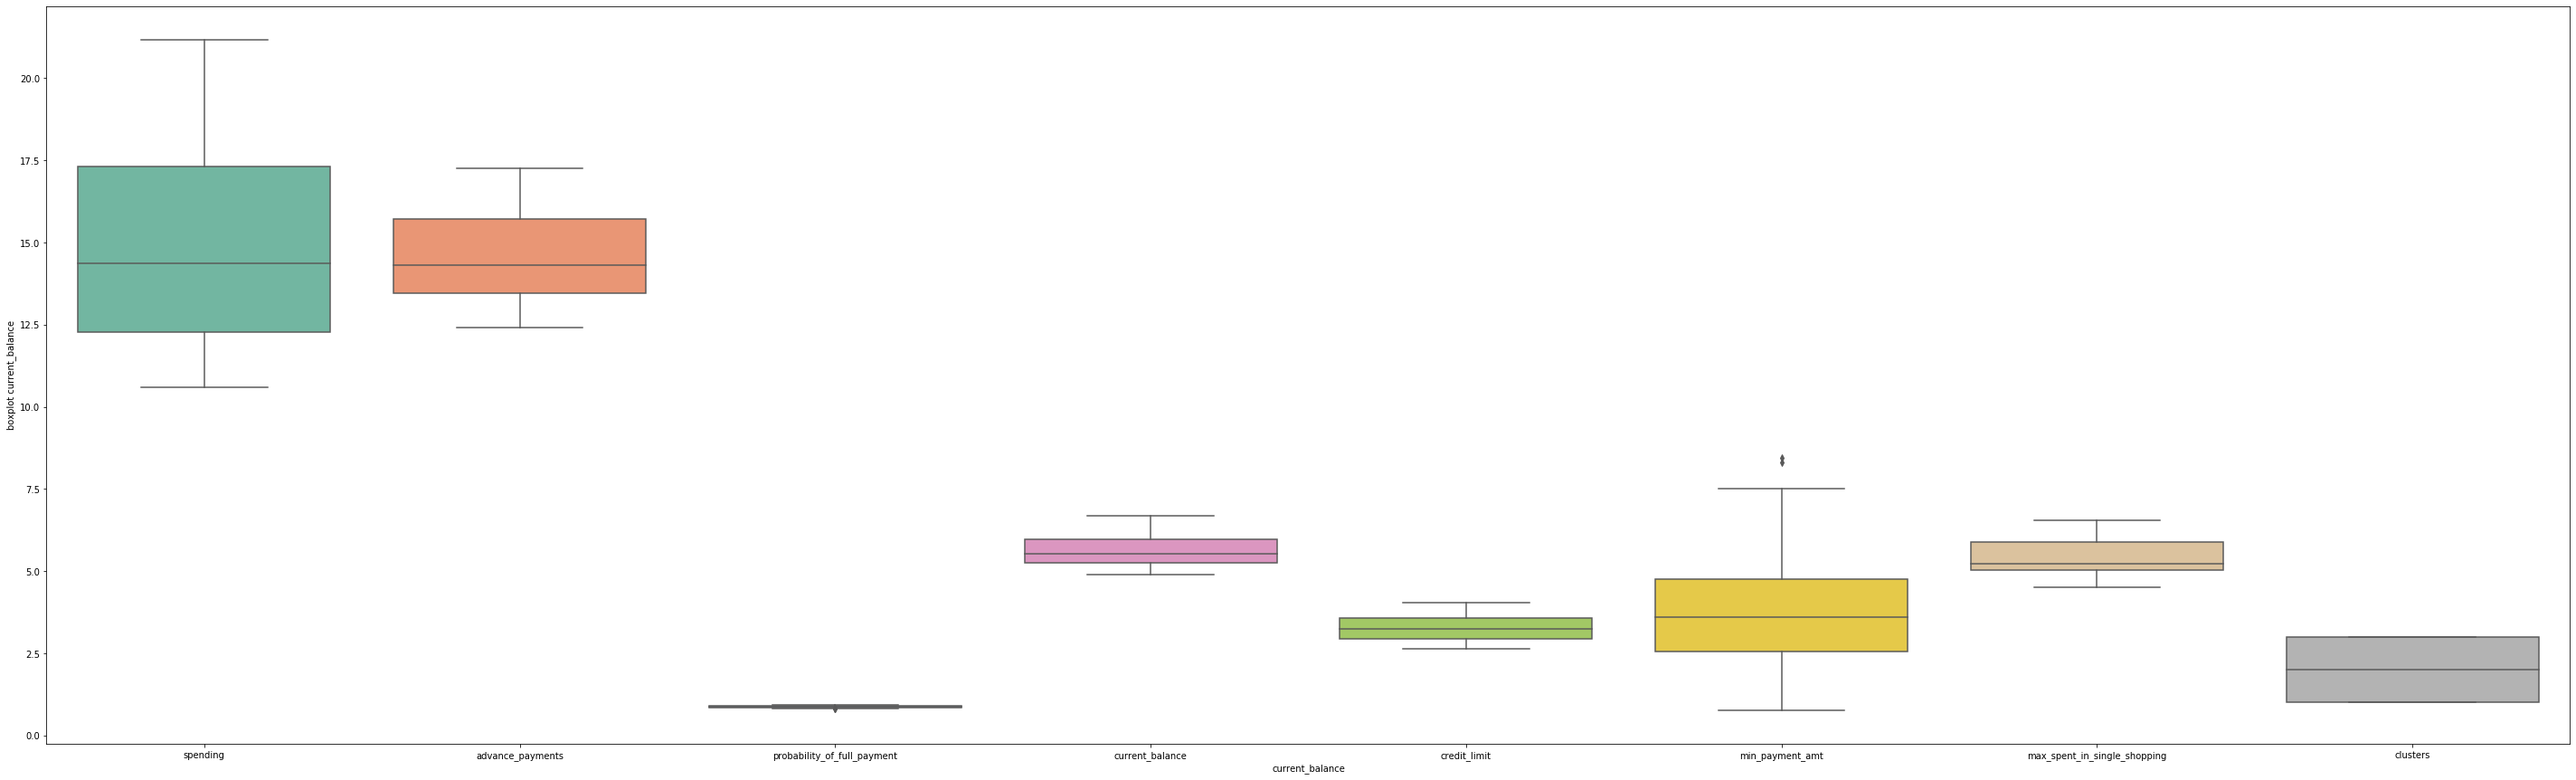

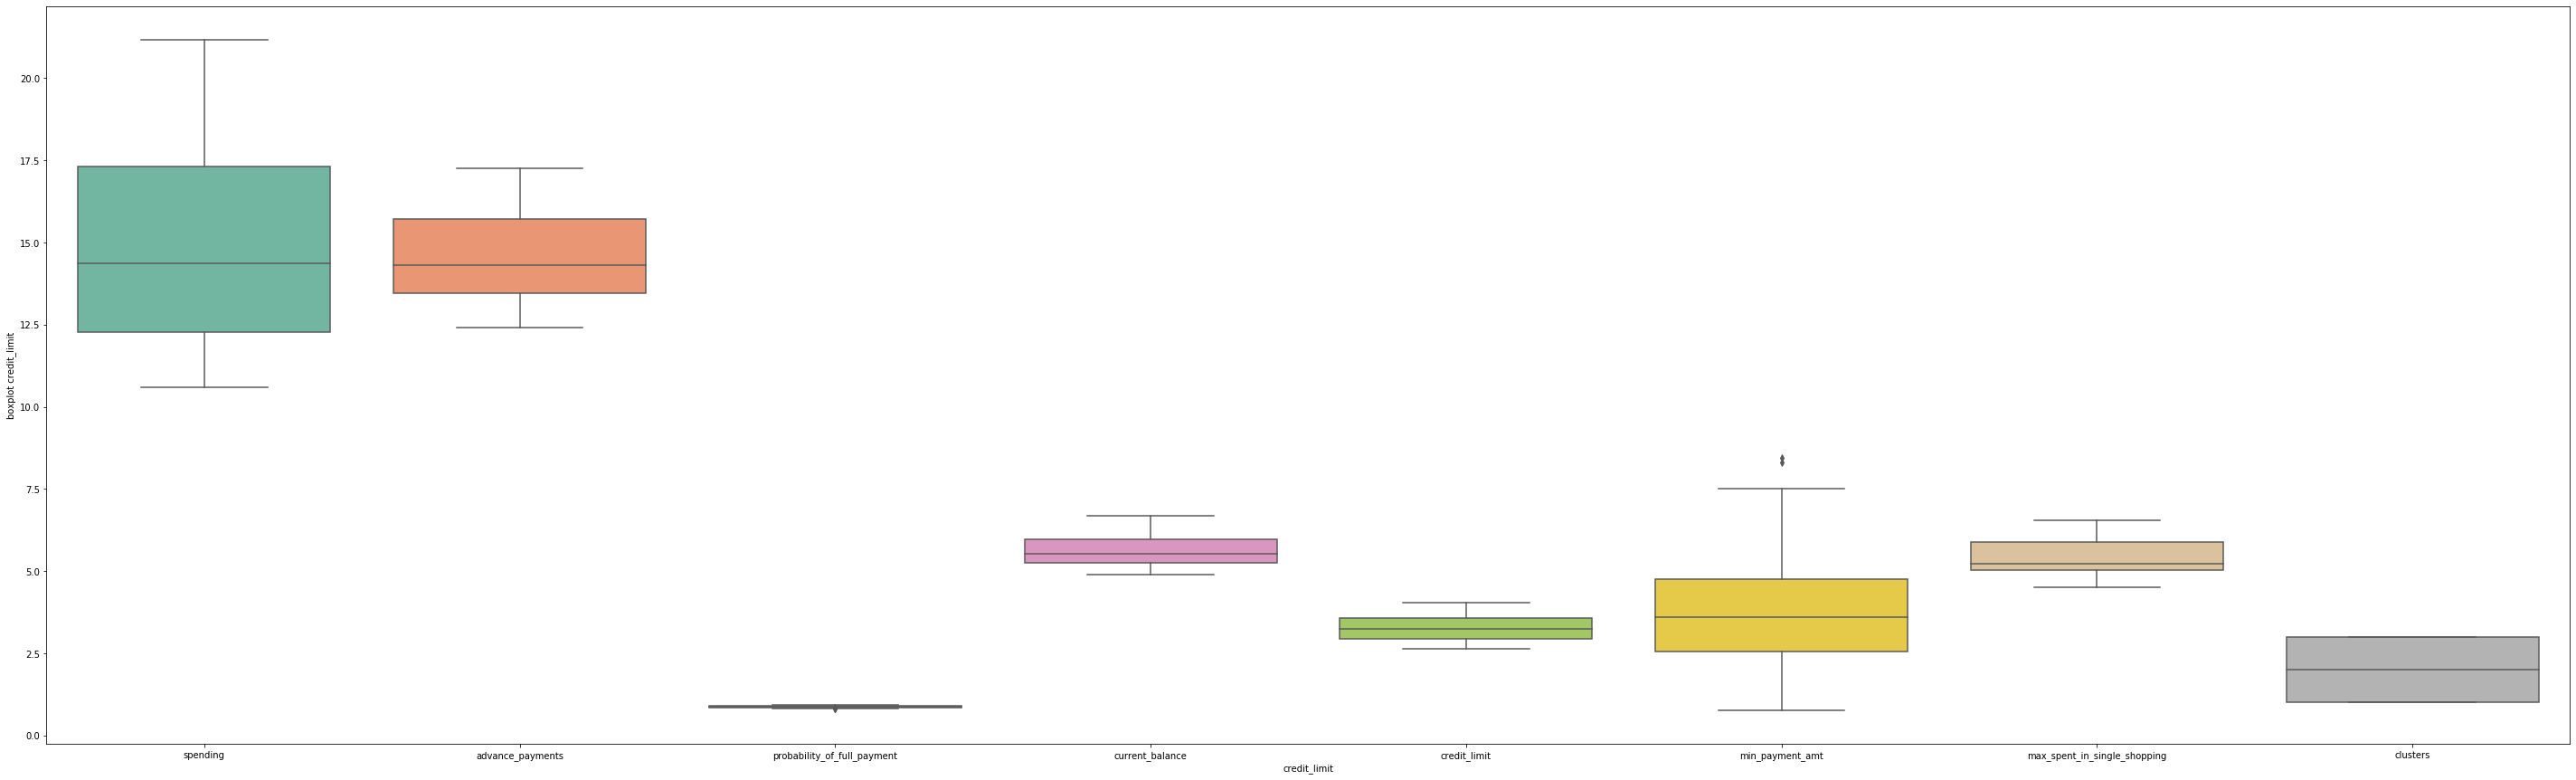

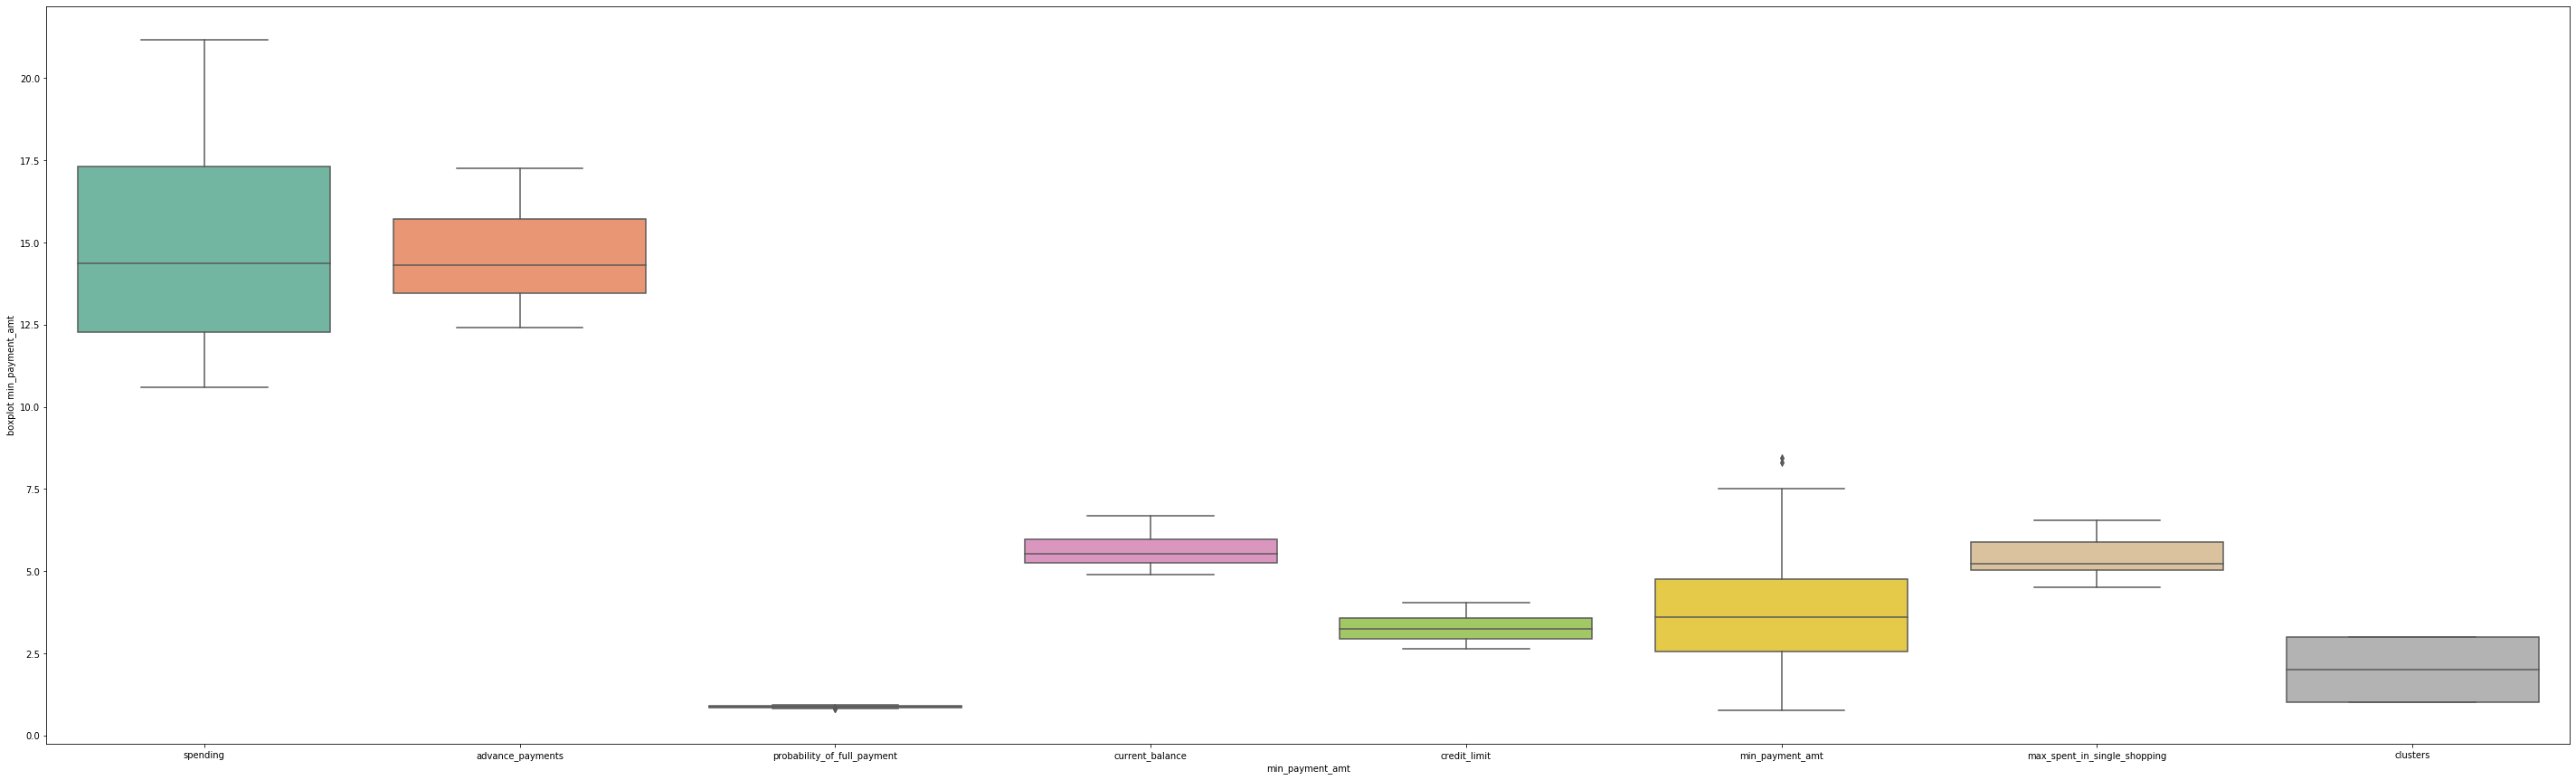

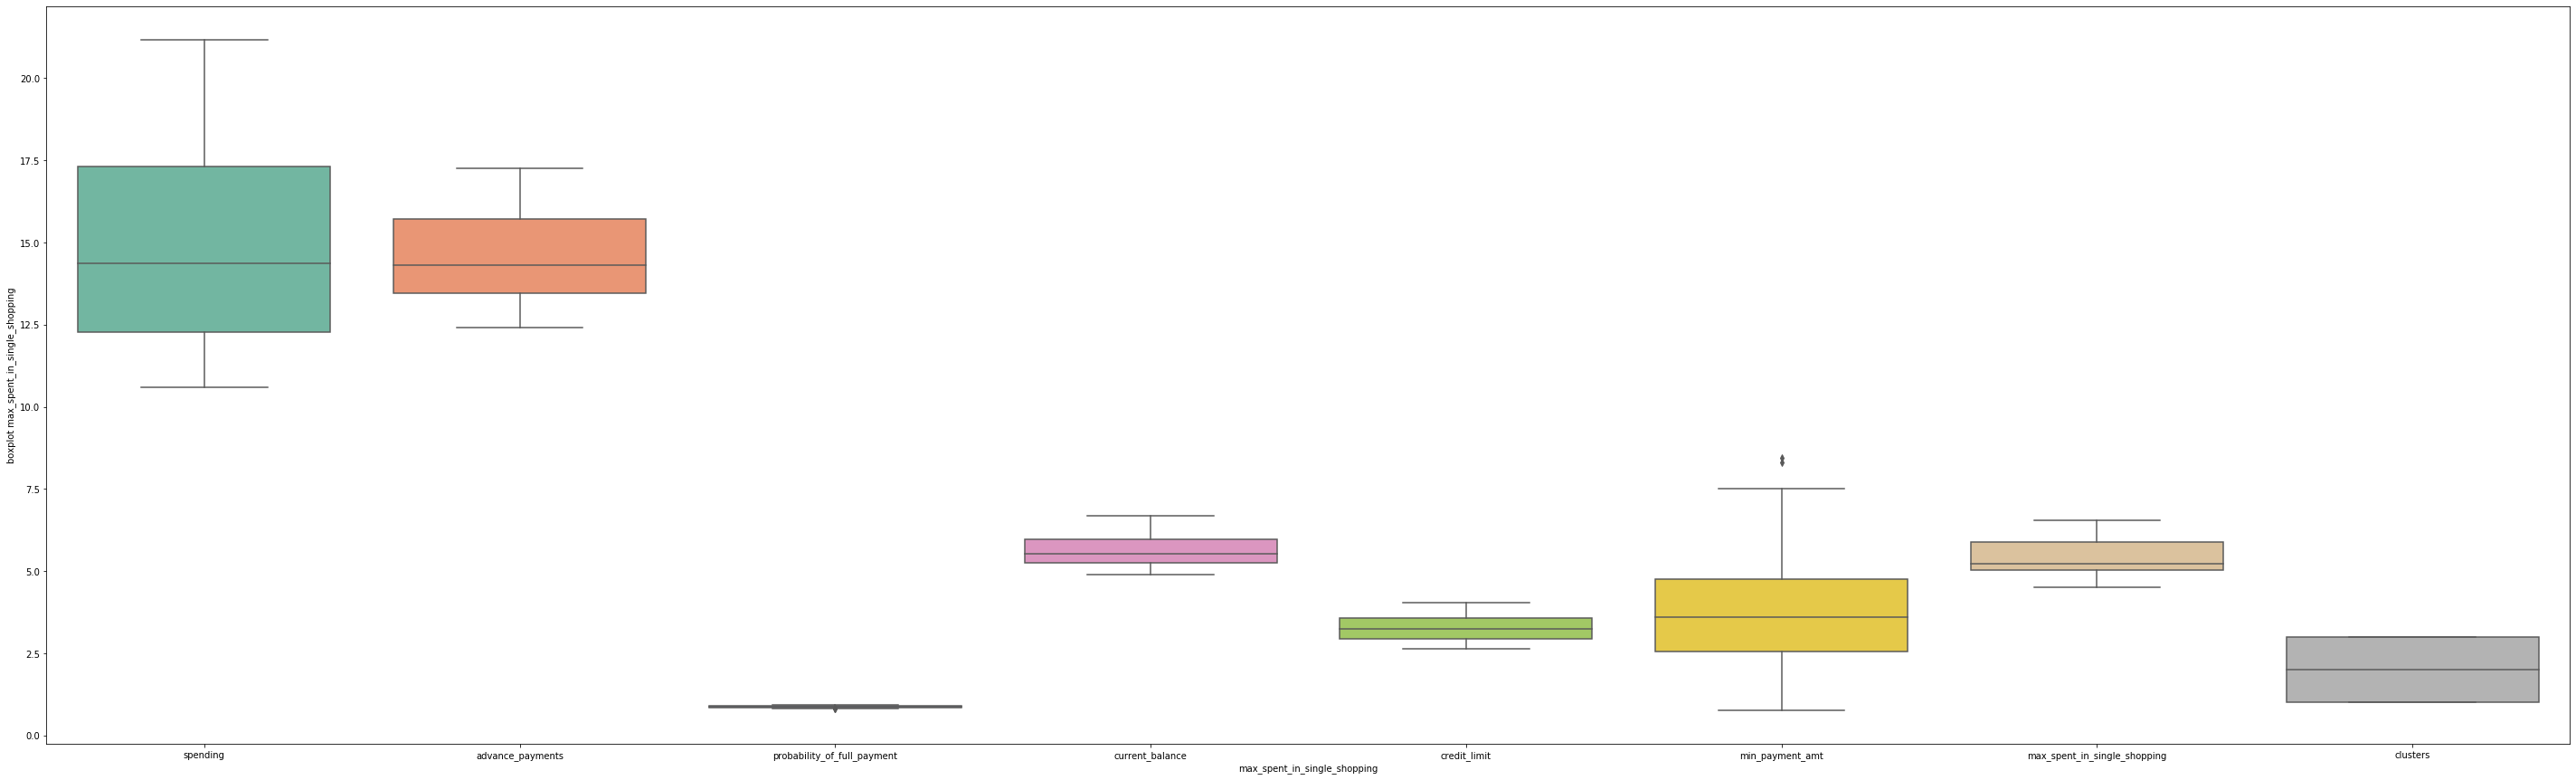

In [23]:
def boxplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            figure = plt.figure(figsize=(50,15))
            sns.boxplot(data=data, orient="v", palette="Set2")
            plt.xlabel(colnames[i])
            plt.ylabel("boxplot "+colnames[i])
            plt.show()
boxplot(data)

In [24]:
import pandas_profiling
df = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data.csv')
profile = df.profile_report(title='Slump+Test')
profile.to_file(output_file="C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data1.html")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data (1).csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837  


In [3]:
print("duplicate sum\n",data.duplicated().sum())
global cust_df
cust_df = data.copy()
print('cust df head\n',cust_df.head())

duplicate sum
 0
cust df head
    spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837  


In [4]:
colvalues=data.columns.values
print(colvalues)
print(colvalues[0])
colvallist=colvalues.tolist()
print(colvallist)
X = StandardScaler()
scaled_df = X.fit_transform(cust_df)
print(scaled_df)

['spending' 'advance_payments' 'probability_of_full_payment'
 'current_balance' 'credit_limit' 'min_payment_amt'
 'max_spent_in_single_shopping']
spending
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']
[[ 1.75435461  1.81196782  0.17822987 ...  1.33857863 -0.29880602
   2.3289982 ]
 [ 0.39358228  0.25383997  1.501773   ...  0.85823561 -0.24280501
  -0.53858174]
 [ 1.41330028  1.42819249  0.50487353 ...  1.317348   -0.22147129
   1.50910692]
 ...
 [-0.2816364  -0.30647202  0.36488339 ... -0.15287318 -1.3221578
  -0.83023461]
 [ 0.43836719  0.33827054  1.23027698 ...  0.60081421 -0.95348449
   0.07123789]
 [ 0.24889256  0.45340314 -0.77624835 ... -0.07325831 -0.70681338
   0.96047321]]


In [5]:
for i in range(1,7):
    k_means = KMeans(n_clusters = i)
    print(k_means.fit(scaled_df))
    print(k_means.labels_)
    print(k_means.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1470.0
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1

In [16]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
print(wss)

[1470.0, 659.1717544870407, 430.65897315130053, 371.2834476674334, 327.4353937624866, 288.95334686682867, 262.0420934510705, 240.8539084819165, 220.73328663041866, 208.87343791724368]


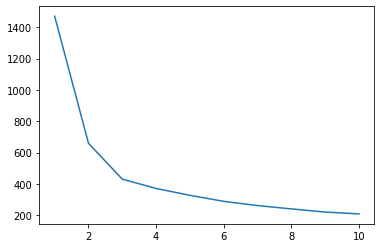

   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Clus_kmeans  
0         3.763            3.252                         6.550            2  
1         3.582            3.336                         5.144            0  
2         3.755            3.368                         6.148            2  
3         2.641            5.182                         5.185            1  
4         3.694            2.068                         5.837            2  


In [17]:
plt.plot(range(1,11), wss)
plt.show()
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_
data["Clus_kmeans"] = labels
print(data.head(5))

In [18]:
print("silhoute score",silhouette_score(scaled_df,labels))
sil_width = silhouette_samples(scaled_df,labels)
data["sil_width"] = sil_width
print(data.head(5))
print(silhouette_samples(scaled_df,labels).min())
data.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_kmeansclust1.csv')

silhoute score 0.4007270552751299
   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Clus_kmeans  \
0         3.763            3.252                         6.550            2   
1         3.582            3.336                         5.144            0   
2         3.755            3.368                         6.148            2   
3         2.641            5.182                         5.185            1   
4         3.694            2.068                         5.837            2   

   sil_width  
0

In [19]:
print(data['Clus_kmeans'].value_counts().sort_index())
clust_profile=data.copy()
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['Freq']=data['Clus_kmeans'].value_counts().sort_index()
print(clust_profile)
clust_profile.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_Kmeans_Aggdata1.csv')

0    71
1    72
2    67
Name: Clus_kmeans, dtype: int64
              spending  advance_payments  probability_of_full_payment  \
Clus_kmeans                                                             
0            14.437887         14.337746                     0.881597   
1            11.856944         13.247778                     0.848253   
2            18.495373         16.203433                     0.884210   

             current_balance  credit_limit  min_payment_amt  \
Clus_kmeans                                                   
0                   5.514577      3.259225         2.707341   
1                   5.231750      2.849542         4.742389   
2                   6.175687      3.697537         3.632373   

             max_spent_in_single_shopping  sil_width  Freq  
Clus_kmeans                                                 
0                                5.120803   0.339816    71  
1                                5.101722   0.397473    72  
2                 

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
data = pd.read_csv("C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837  


In [22]:
colvalues=data.columns.values
print(colvalues)
print(colvalues[0])
colvallist=colvalues.tolist()
print(colvallist)
X = StandardScaler()
scaled_df = X.fit_transform(data)
print("scaled_df head\n",pd.DataFrame(scaled_df).head())

['spending' 'advance_payments' 'probability_of_full_payment'
 'current_balance' 'credit_limit' 'min_payment_amt'
 'max_spent_in_single_shopping']
spending
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']
scaled_df head
           0         1         2         3         4         5         6
0  1.754355  1.811968  0.178230  2.367533  1.338579 -0.298806  2.328998
1  0.393582  0.253840  1.501773 -0.600744  0.858236 -0.242805 -0.538582
2  1.413300  1.428192  0.504874  1.401485  1.317348 -0.221471  1.509107
3 -1.384034 -1.227533 -2.591878 -0.793049 -1.639017  0.987884 -0.454961
4  1.082581  0.998364  1.196340  0.591544  1.155464 -1.088154  0.874813


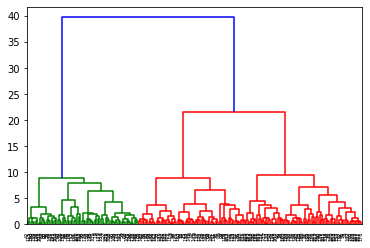

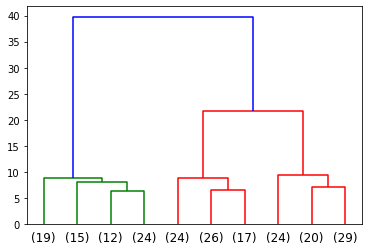

In [23]:
wardlink = linkage(scaled_df, method = 'ward')
dend = dendrogram(wardlink)
plt.show()
dend = dendrogram(wardlink,truncate_mode='lastp',p = 10,)
plt.show()

In [24]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
print(clusters)
clusters = fcluster(wardlink, 22, criterion='distance')
print(clusters)

[1 2 1 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 1 1
 2 1 2 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 2 1 2
 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 1 2 1 2]
[1 2 1 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 1 1
 2 1 2 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 2 1 2
 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 1 2 1 2]


In [25]:
data['clusters'] = clusters
print(data.head())
print(data.clusters.value_counts().sort_index())
data.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_clusthiretclsutt.csv')

   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters  
0         3.763            3.252                         6.550         1  
1         3.582            3.336                         5.144         2  
2         3.755            3.368                         6.148         1  
3         2.641            5.182                         5.185         2  
4         3.694            2.068                         5.837         1  
1     70
2    140
Name: clusters, dtype: int64


In [27]:
print("cluster based sort\n",data['clusters'].value_counts().sort_index())
aggdata=data.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=data['clusters'].value_counts().sort_index()
print("aggdata\n",aggdata)
aggdata.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_Aggdata88_1.csv')

cluster based sort
 1     70
2    140
Name: clusters, dtype: int64
aggdata
            spending  advance_payments  probability_of_full_payment  \
clusters                                                             
1         18.371429         16.145429                     0.884400   
2         13.085571         13.766214                     0.864298   

          current_balance  credit_limit  min_payment_amt  \
clusters                                                   
1                6.158171      3.684629         3.639157   
2                5.363714      3.045593         3.730723   

          max_spent_in_single_shopping  Freq  
clusters                                      
1                             6.017371    70  
2                             5.103421   140  


In [28]:
def silhoutescorecalc():
    silhscore=[]
    for i in range (2,5):
        k_means = KMeans(n_clusters = i,random_state=0)
        k_means.fit(scaled_df)
        labels = k_means.labels_
        silhscore.append(silhouette_score(scaled_df,labels))
    print("silhoute score",silhscore)

silhoutescorecalc()   

silhoute score [0.46577247686580914, 0.4007270552751299, 0.3369008229710853]


In [29]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_
data["Clus_kmeans"] = labels
print(data.head(5))

   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters  \
0         3.763            3.252                         6.550         1   
1         3.582            3.336                         5.144         2   
2         3.755            3.368                         6.148         1   
3         2.641            5.182                         5.185         2   
4         3.694            2.068                         5.837         1   

   Clus_kmeans  
0            1  
1            0  
2            1  


In [30]:
print("silhoute score",silhouette_score(scaled_df,labels))
sil_width = silhouette_samples(scaled_df,labels)
data["sil_width"] = sil_width
print(data.head(5))
print(silhouette_samples(scaled_df,labels).min())
data.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_kmeansclust190.csv')

silhoute score 0.46577247686580914
   spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters  \
0         3.763            3.252                         6.550         1   
1         3.582            3.336                         5.144         2   
2         3.755            3.368                         6.148         1   
3         2.641            5.182                         5.185         2   
4         3.694            2.068                         5.837         1   

   Clus_kmeans  sil_width  
0    

In [31]:
print(data['Clus_kmeans'].value_counts().sort_index())
clust_profile=data.copy()
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['Freq']=data['Clus_kmeans'].value_counts().sort_index()
print(clust_profile)
clust_profile.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data_Kmeans_Aggdata91.csv')

0    133
1     77
Name: Clus_kmeans, dtype: int64
              spending  advance_payments  probability_of_full_payment  \
Clus_kmeans                                                             
0            12.930602         13.693459                     0.863577   
1            18.158571         16.054805                     0.883817   

             current_balance  credit_limit  min_payment_amt  \
Clus_kmeans                                                   
0                   5.339699      3.025917         3.827444   
1                   6.127429      3.660519         3.480417   

             max_spent_in_single_shopping  clusters  sil_width  Freq  
Clus_kmeans                                                           
0                                5.081737  2.000000   0.439683   133  
1                                5.971740  1.090909   0.510837    77  


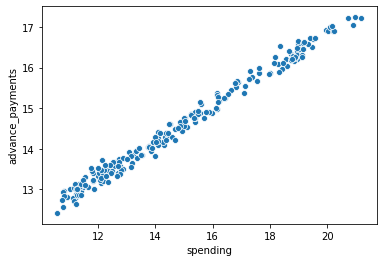

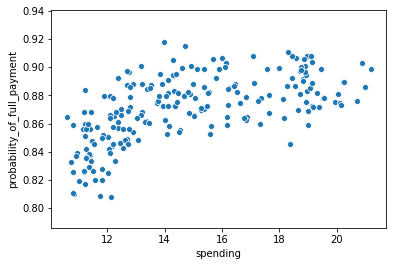

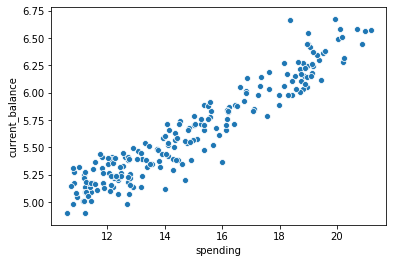

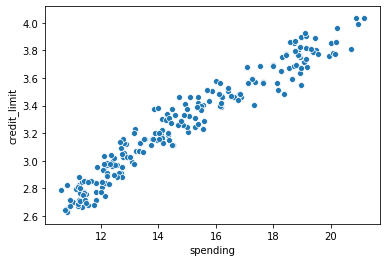

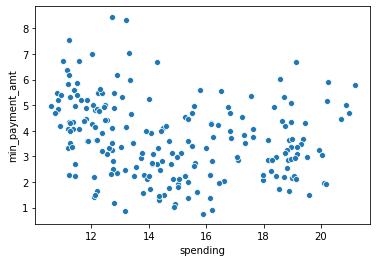

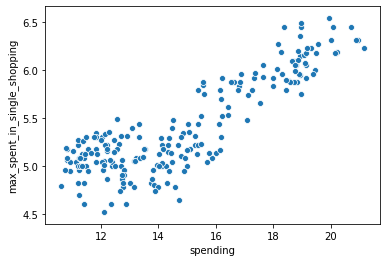

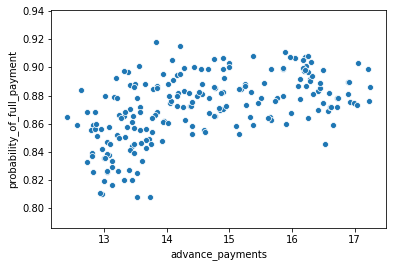

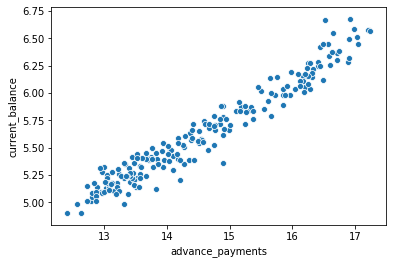

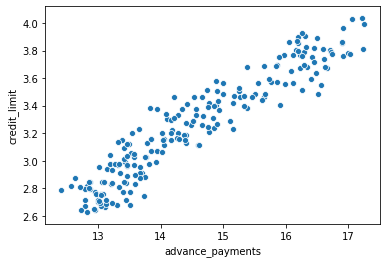

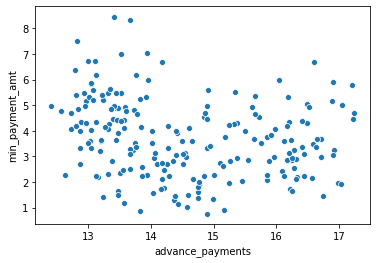

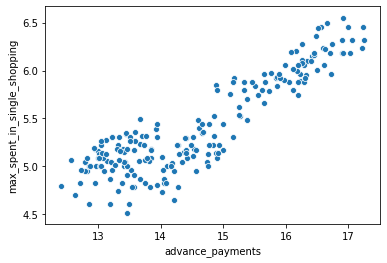

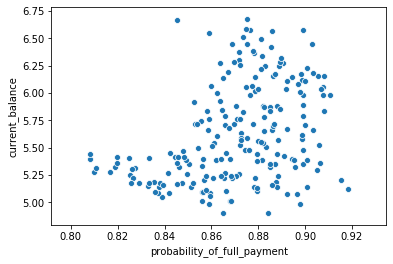

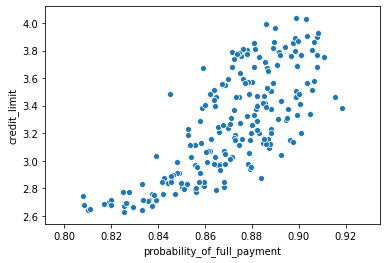

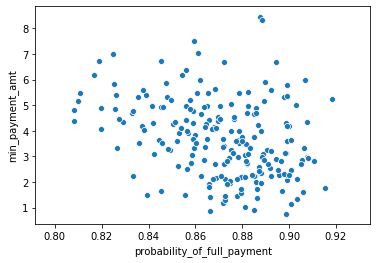

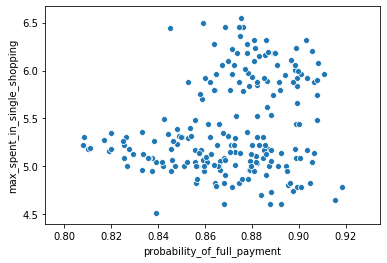

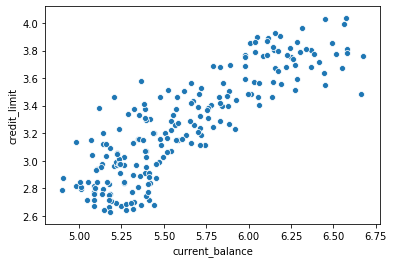

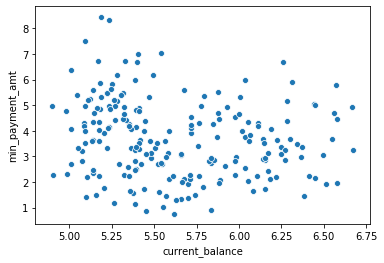

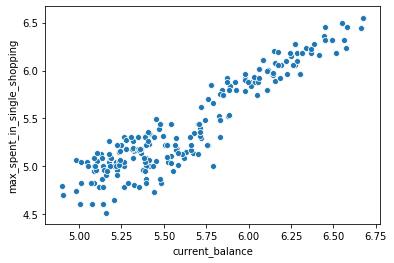

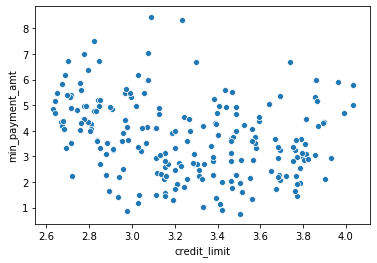

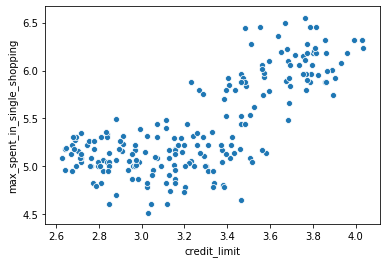

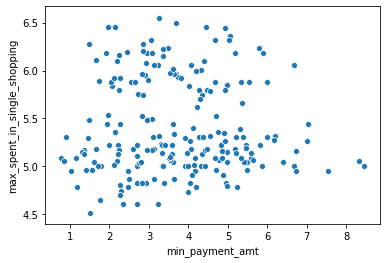

In [34]:
data = pd.read_csv("C:/Users/Thiyaneswaran_Manoha/Downloads/bank_marketing_part1_Data.csv")
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            for j in range(i+1,7):
                sns.scatterplot(data.iloc[:,i], data.iloc[:,j]) 
                plt.xlabel(colnames[i])
                plt.ylabel(colnames[j])
                plt.show()
multiscatplot(data)